# <font size=6>**Estatística com R: testes de hipóteses**</font>

Estamos atuando como **cientistas de dados** em uma empresa que presta consultoria a muitas empresas das mais diversas áreas.

Aqui, precisaremos auxiliar estas empresas a coletar informações importantes dos dados que possuem ajudando nas tomadas de decisões dentro da empresa. Para isso, vamos utilizar uma série de conceitos da estatística para investigar e auxiliar nos problemas e demandas que ela está enfrentando, baseando suas decisões na formulação de hipóteses com os dados recebidos.

Neste projeto, vamos ter acesso a resultados de pesquisas e dados levantados por times de marketing, atendimento ao cliente, logística entre outros.

**Desafio**

Nosso desafio é aplicar os conceitos de **inferência estatística**, **teste de hipóteses**, aplicação do **p-valor** e **nível de significância** para analisar os dados e testar hipóteses para agregar valor aos times e ajudar nos processos de decisão. Para isso, serão repassados algumas demandas que foram separadas para que nós possamos contribuir na execução dessa análise.

Vamos utilizar a **linguagem R** para responder todos os questionamentos levantados.

# **1. Teste de normalidade e etapas de um teste de hipótese**

---



## **1.1 Iniciando o projeto**

Vamos aplicar ao longo deste documento diversos tipos de teste de hipóteses. Para isso vamos importar alguns pacotes que são extremamente importantes para pessoas cientistas e pesquisadoras e que vão nos auxiliar em cada problema que devemos responder.

### **Importando os pacotes**

In [ ]:
# Baixando o arquivo de ambiente do R
R_environment_file <- "https://github.com/alura-cursos/estatistica-r-testes-hipoteses/raw/refs/heads/main/libs/library.tar.gz"

download.file(R_environment_file, destfile="./library.tar.gz")

# unzip do arquivo library do R: 'library.tar.gz' para a pasta library do R
untar("library.tar.gz", "library")

# Mudando a pasta das libs do R para './library'
.libPaths("library")

In [ ]:
# Importando os pacotes do projeto
library(dplyr, warn.conflicts = F)
library(ggplot2, warn.conflicts = F)
library(rstatix, warn.conflicts = F)
library(BSDA, warn.conflicts = F)
options(repr.matrix.max.rows = 10)

In [ ]:
# Ajustando parâmetros para visuais que serão construídos ao longo do curso
options(repr.plot.width = 16, repr.plot.height = 8)
tema <- theme(
        plot.title=element_text(size = 22, hjust = 0.5),
        axis.title.y=element_text(size = 16, vjust = +0.2),
        axis.title.x=element_text(size = 16, vjust = -0.2),
        axis.text.y=element_text(size = 14),
        axis.text.x=element_text(size = 14),
        legend.position = "none")

No curso anterior, nós já aprendemos a:
* Estimar valores;
* Calcular probabilidades de uma distribuição normal;
* Calcular intervalos de confiança e tamanhos de amostra;
* Compreender o que é nível de confiança e significância.

Tudo isso para dar uma base a este curso voltado aos **testes de hipóteses**.

De forma resumida, os **testes de hipóteses** são ferramentas utilizadas para tomar decisões ou tirar conclusões sobre uma população com base em dados amostrais.

Aqui, nós agimos como detetives levantando **hipóteses** (**afirmações**) baseadas em **probabilidade** e avaliando se as evidências coletadas **sustentam ou refutam** essas afirmações.

Ele testa coisas como "Existe diferença significativa entre dois grupos?", "A média observada é compatível com o valor esperado?" ou ainda "As variáveis estão relacionadas?". Quando usamos testes estatísticos, queremos entender padrões nos dados, comparar grupos ou verificar relações entre variáveis.

Neste curso, dividiremos os testes de hipóteses em dois grandes tipos:

* Testes paramétricos
* Testes não paramétricos



Ao longo do curso, abordaremos uma série de problemas práticos, aplicando testes de hipóteses utilizando a linguagem R e te preparando para escolher qual a abordagem mais adequada em diferentes contextos e como interpretar os resultados.

Vamos nessa?

## **1.2 Teste de normalidade (Shapiro-Wilk)**

---



Vamos trabalhar com o nosso primeiro teste estatístico. Com ele vamos avaliar as hipóteses feitas sobre os parâmetros populacionais e aceitá-las ou rejeitá-las como provavelmente verdadeiras ou falsas tendo como base uma amostra.

Para isso, vamos responder ao primeiro case trazido pelo time de RH de uma grande empresa de e-commerce.

### <font color="#E23155" face="Verdana">Demanda 1: Analisando as distribuições da remuneração e tempo de treinamento</font>

Em uma empresa varejista de e-commerce, a área de Recursos Humanos está realizando uma **análise dos dados dos colaboradores** para entender melhor a distribuição de duas variáveis importantes:

* A **remuneração** dos funcionários, que reflete a estrutura salarial da empresa.
* As **horas de treinamento** realizadas pelos colaboradores durante o ano de 2024, que indicam o investimento em capacitação.

No entanto, antes de aplicar qualquer teste estatístico, é essencial verificar se essas variáveis seguem uma **distribuição normal**, pois muitos métodos estatísticos assumem a normalidade dos dados.

Para garantir que as análises futuras sejam confiáveis, é necessário responder às seguintes perguntas:

* A distribuição da **remuneração** dos colaboradores é normal?
* A distribuição das **horas de treinamento** é normal?


### <font color="#E23155" face="Verdana">Solução:</font>

### **Teste de Normalidade de Shapiro-Wilk**

O **Teste de Shapiro-Wilk** é um teste de hipóteses que avalia se uma amostra de dados vem de uma **distribuição normal**. Ele compara a distribuição observada com uma distribuição normal teórica, gerando um **p-valor**.

* Se o **p-valor** for maior que o nível de significância (geralmente 0,05), **não rejeitamos a hipótese nula**, ou seja, os dados seguem uma distribuição normal.

* Se o **p-valor** for menor que o nível de significância, **rejeitamos a hipótese nula**, indicando que os dados não seguem uma distribuição normal.

Além do teste, a visualização gráfica por meio, por exemplo, de histogramas e/ou curvas de densidade ajuda a entender a forma da distribuição e complementa a análise.

> **Documentações:**
>
> - [**shapiro.test**](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/shapiro.test)


#### **Lendo os dados**

In [ ]:
dados <- read.csv("https://raw.githubusercontent.com/alura-cursos/estatistica-r-testes-hipoteses/refs/heads/main/dados/colaboradores.csv")

In [ ]:
head(dados)

,id_colaborador,nome,sexo_biologico,idade,cargo,nota_desempenho,remuneracao,horas_treinamento
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<int>
1,DIR000001,Théo Sales,Masculino,45,Diretor(a),Bom,29950.79,17
2,DIR000002,Isis Pinto,Feminino,45,Diretor(a),Bom,27261.07,22
3,DIR000003,Isabelly Garcia,Feminino,45,Diretor(a),Bom,25635.61,29
4,DIR000004,Nina Pereira,Feminino,45,Diretor(a),Excelente,27678.60,18
5,DIR000005,Otávio Azevedo,Masculino,46,Diretor(a),Excelente,32084.55,25
6,GER000006,João Pedro da Mata,Masculino,42,Gerente,Excelente,21656.81,17


In [ ]:
nrow(dados)

[1] 11090

#### **Definindo a significância do teste ($\alpha$)?**

In [ ]:
significancia <- 0.05

#### **Visualizando as distribuições**

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


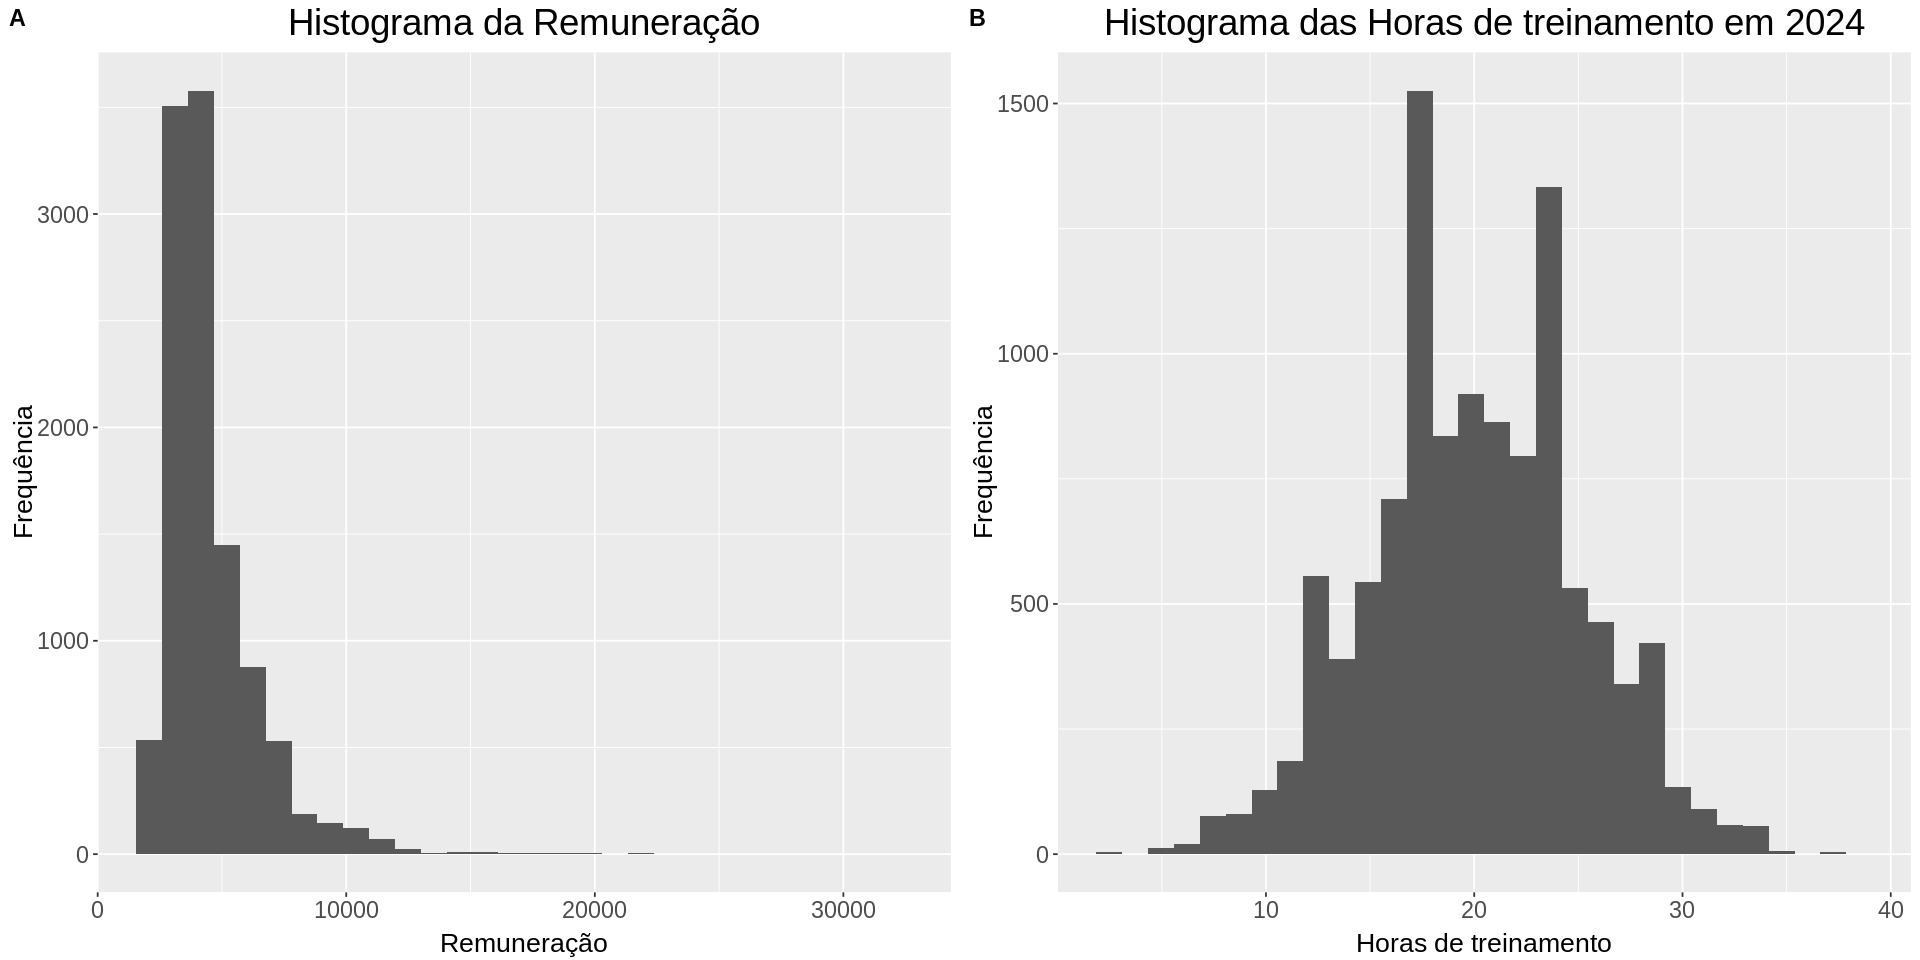

In [ ]:
library(cowplot)

p1 <- ggplot(dados, aes(x = remuneracao)) + geom_histogram() +
    labs(y = "Frequência", x = "Remuneração", title = "Histograma da Remuneração") +
    tema

p2 <- ggplot(dados, aes(x = horas_treinamento)) +  geom_histogram() +
    labs(y = "Frequência", x = "Horas de treinamento", title = "Histograma das Horas de treinamento em 2024") +
    tema

plot_grid(p1, p2, labels = "AUTO")

Podemos observar que a distribuição da remuneração dos colaboradores parece ser **assimétrica**, com alguns salários muito altos puxando a média para cima. Além disso, há dúvidas sobre a distribuição das horas de treinamento.

#### **Testando a variável `remuneracao`**

### <font color='green'>Critério do $p_{value}$</font>

> ### Rejeitar $H_0$ se o $p_{value} \leq \alpha$

In [ ]:
set.seed(2025)
amostra <- sample_n(dados, 500)

In [ ]:
resultado <- shapiro.test(amostra$remuneracao)
resultado


	Shapiro-Wilk normality test

data:  amostra$remuneracao
W = 0.81457, p-value < 2.2e-16


In [ ]:
p_valor <- resultado$p.value
p_valor

[1] 1.458569e-23

In [ ]:
p_valor <= significancia

[1] TRUE

Ao executar o código em R, observamos o seguinte resultado para **remuneração**:

* O teste de Shapiro-Wilk retornou um p-valor **muito baixo** (p < 0.05), indicando que a distribuição da remuneração **não é normal**.

* O histograma nos mostrou que temos uma **distribuição assimétrica à direita**, com uma cauda longa para valores altos de remuneração. Isso é comum em dados salariais, onde poucos colaboradores têm salários muito altos.

#### **Testando a variável `horas_treinamento`**

### <font color='green'>Critério do $p_{value}$</font>

> ### Rejeitar $H_0$ se o $p_{value} \leq \alpha$

In [ ]:
resultado <- shapiro.test(amostra$horas_treinamento)
resultado


	Shapiro-Wilk normality test

data:  amostra$horas_treinamento
W = 0.99428, p-value = 0.05759


In [ ]:
p_valor <- resultado$p.value
p_valor

[1] 0.05759459

In [ ]:
p_valor <= significancia

[1] FALSE

Ao executar o código em R, observamos o seguinte resultado para **horas de treinamento**:

* O teste de Shapiro-Wilk retornou um p-valor **maior que 0.05**, sugerindo que a distribuição das horas de treinamento pode ser considerada normal.

* O histograma mostra uma distribuição mais simétrica, com a maioria dos colaboradores concentrada em um número médio de horas de treinamento.

Com base nesses resultados, podemos concluir que:

* Para a **remuneração**, métodos estatísticos que não assumem normalidade (não paramétricos) podem ser utilizados.

* Para as **horas de treinamento**, métodos paramétricos podem ser aplicados com maior confiança.

## **1.3 Etapas de um teste de hipótese**

---



Nada melhor que aprender sobre teste de hipótese que praticando, correto?

Por isso, vamos aprender as **etapas básicas de um teste de hipótese** trabalhando com um problema de uma distribuição normal utilizando um **teste paramétrico**. Um teste é chamado de **paramétrico** quando ele assume determinadas premissas sobre os parâmetros de uma população.

Vamos ver um exemplo aqui, mas ao longo do curso aprenderemos que existem mais de um tipo e cada um tem a sua particularidade.

### <font color="#E23155" face="Verdana">Demanda 2: Analisando a amostra dos sucos de frutas</font>

Uma empresa que produz **sucos de frutas em embalagens de 500 ml** utiliza um processo de produção quase totalmente automatizado. No entanto, a máquina responsável pelo preenchimento das embalagens às vezes apresenta desajustes, levando a erros no volume de suco.

Quando o volume médio cai abaixo de 500 ml, a empresa enfrenta riscos de perda de vendas e problemas com órgãos fiscalizadores. Por outro lado, quando o volume ultrapassa 500 ml, a empresa começa a se preocupar com prejuízos no processo de produção.

Para monitorar o processo, o setor de controle de qualidade coleta periodicamente **amostras de 50 embalagens** para a realização de testes de hipóteses para verificar se a máquina está desajustada. O **nível de significância que vamos adotar é de 5%**.

Em uma amostra recente de **50 embalagens**, a média amostral observada foi de **503,24 ml**. A questão que surge é:

* Esse valor de **média amostral é suficientemente maior que 500 ml** para rejeitarmos a hipótese de que a média do processo é de 500 ml, ao nível de significância de 5%?

### <font color="#E23155" face="Verdana">Solução:</font>

Para solucionar este problema, vamos dividí-lo em passos para investigar se rejeitamos ou não a hipótese nula ($H_0$).

O processo que faremos aqui será aplicado a muitos testes ao longo deste documento.

#### **Dados do problema**

O **teste bicaudal** é muito utilizado em **testes de qualidade**, como o apresentado em nosso problema acima. Outro exemplo é a avaliação de peças que devem ter um encaixe perfeito (porcas e parafusos, chaves e fechaduras etc.).

<img src="https://github.com/alura-cursos/estatistica-r-testes-hipoteses/blob/main/imagens/outros/teste_z_bicaudal.png?raw=true" alt="Distribuição normal com as áreas de rejeição e aceitação de H0" width="460">

In [ ]:
amostra <- data.frame(Amostra = c(509, 505, 495, 510, 496, 509, 497, 502, 503, 505,
                                  501, 505, 510, 505, 504, 497, 506, 506, 508, 505,
                                  497, 504, 500, 498, 506, 496, 508, 497, 503, 501,
                                  503, 506, 499, 498, 509, 507, 503, 499, 509, 495,
                                  502, 505, 504, 509, 508, 501, 505, 497, 508, 507) )
head(amostra)

,Amostra
,<dbl>
1,509
2,505
3,495
4,510
5,496
6,509


In [ ]:
media_amostra <- mean(amostra$Amostra)
media_amostra

[1] 503.24

In [ ]:
desvio_padrao_amostra <- sd(amostra$Amostra)
desvio_padrao_amostra

[1] 4.483803

In [ ]:
media <- 500
n <- 50

### **Passo 1** - Formulação das hipóteses $H_0$ e $H_1$;

> ### <font color='green'>Pontos importantes</font>
> - De maneira geral, a hipótese alternativa $H_1$ traz a afirmação sobre o parâmetro que esperamos ser verdadeira.
>
> - A hipótese nula ($H_0$) sempre afirma uma igualdade ("$=$" ou por "$\geq$" e "$\leq$") ou propriedade populacional.
>
> - Já a hipótese alternativa $H_1$ é definida por uma desigualdade que pode ser uma diferença simples "$\neq$" ou dos tipos "$>$" e "$<$", e sempre é complementar ao estabelecido pela $H_0$.

#### **Hipóteses**

#### <font color='green'>Lembre-se, a hipótese nula **sempre** contém a alegação de igualdade</font>
> ### $H_0: \mu = 500$
>
> ### $H_1: \mu \neq 500$



---



### **Passo 2** - Escolha da distribuição amostral adequada

> ### <font color='green'>Pontos importantes</font>
>
> - Quando o tamanho da amostra tiver 30 elementos ou mais, deve-se utilizar a distribuição normal, como estabelecido pelo **teorema do limite central**.
>
> - Para um tamanho de amostra menor que 30 elementos, e se pudermos afirmar que a população se distribui aproximadamente como uma normal e o desvio padrão populacional for conhecido, deve-se utilizar a distribuição normal.
>
> - Para um tamanho de amostra menor que 30 elementos, e se pudermos afirmar que a população se distribui aproximadamente como uma normal e o desvio padrão populacional for desconhecido, deve-se utilizar a distribuição t de Student.
>
> <img src="https://github.com/alura-cursos/estatistica-r-testes-hipoteses/blob/main/imagens/outros/qual_distribuicao_escolher.png?raw=true" alt="Diagrama para escolha da distribuição amostral adequada">

#### **O tamanho da amostra é maior que 30?**

**Resposta:** Sim

#### **O desvio padrão populacional ($\sigma$) é conhecido?**

**Resposta:** Não. Inclusive, calculamos o desvio padrão amostral para nosso problema ($S$)



---



### **Passo 3** - Fixação da significância do teste ($\alpha$), que define as regiões de aceitação e rejeição das hipóteses (os valores mais freqüentes são 10%, 5% e 1%)
>
>O **nível de significância** ($\alpha$) expressa a probabilidade de erro da estimativa. De forma complementar, o **nível de confiança** ($1 - \alpha$) representa a probabilidade de acerto desta estimativa.
>
>&nbsp;
>
> <img src="https://github.com/alura-cursos/estatistica-r-testes-hipoteses/blob/main/imagens/outros/confianca_significancia.png?raw=true" alt="Distribuição normal com as áreas do nível de confiança e significância" width="460">
>
>&nbsp;
>
> O **nível de confiança** representa o grau de confiabilidade do resultado da estimativa estar dentro de determinado intervalo. Quando fixamos em uma pesquisa um **nível de confiança** de 95%, por exemplo, estamos assumindo que existe uma probabilidade de 95% dos resultados da pesquisa representarem bem a realidade, ou seja, estarem corretos.
>
> &nbsp;
>
> <img src="https://github.com/alura-cursos/estatistica-r-testes-hipoteses/blob/main/imagens/outros/teste_uni_bicaudal.png?raw=true" alt="Distribuições normais unicaudal inferior, bicaudal e unicaudal superior com as faixas de rejeição e aceitação de H0">

> **Documentações:**
>
> - [**Normal**](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/Normal)


In [ ]:
significancia <- 0.05
confianca <- 1 - significancia

> O nível de significância é a **probabilidade máxima tolerável** pelo tomador de decisão para cometer o **Erro tipo I**.

In [ ]:
probabilidade <- (0.5 + (confianca / 2))
probabilidade

[1] 0.975

#### **Obtendo $z_{\alpha/2}$**

In [ ]:
z_alpha_2 <- qnorm(probabilidade)
z_alpha_2

[1] 1.959964

<img src="https://github.com/alura-cursos/estatistica-r-testes-hipoteses/blob/main/imagens/outros/teste_z_bicaudal_5%25.png?raw=true" alt="Distribuição normal (Z) com 5% de significância" width="460">



---



### **Passo 4** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste

> ### <font color='green'>Pontos importantes</font>
> - Nos testes paramétricos, é a distância relativa entre a estatística amostral e o valor alegado como provável.
> - Aqui, são obtidas as estatísticas amostrais necessárias à execução do teste (média, desvio-padrão, graus de liberdade etc.)

Para o nosso caso, aplicando um Teste Z:

### $$z = \frac{\bar{x} - \mu_0}{\frac{s}{\sqrt{n}}}$$

onde,
* $\bar{x}$ = media amostral
* $\mu_0$ = média populacional sob $H_0$
* $s$ = desvio padrão amostral
* $n$ = tamanho da amostra

In [ ]:
z <- (media_amostra - media) / (desvio_padrao_amostra / sqrt(n))
z

[1] 5.10956

<img src="https://github.com/alura-cursos/estatistica-r-testes-hipoteses/blob/main/imagens/outros/teste_z_bicaudal_problema.png?raw=true" alt="Distribuição normal (Z) com 5% de significância e a estatística de teste de z = 5,11" width="460">



---



### **Passo 5** - Aceitação ou rejeição da hipótese nula

> ### <font color='green'>Pontos importantes</font>
>
> - No caso do intervalo de aceitação conter a estatística-teste, aceita-se $H_0$ como estatisticamente válido e rejeita-se $H_1$ como tal.
>
> - No caso do intervalo de aceitação **não** conter a estatística-teste, rejeita-se $H_0$ e aceita-se $H_1$ como provavelmente verdadeira.
>
> - Podemos verificar a aceitação também a partir do p-valor: se menor ou igual que $\alpha$, rejeita-se $H_0$.

<img src="https://github.com/alura-cursos/estatistica-r-testes-hipoteses/blob/main/imagens/outros/teste_z.png?raw=true" alt="Tabela do Teste Z com as hipóteses, estatísticas de teste, valor crítico z e p-valor">

### <font color='green'>Critério do valor crítico</font>
> ### Teste Z Bicaudal
>
> ### Rejeitar $H_0$ se $z \leq -z_{\alpha/2}$ ou se $z \geq z_{\alpha/2}$

In [ ]:
z <= -z_alpha_2

[1] FALSE

In [ ]:
z >= z_alpha_2

[1] TRUE

In [ ]:
if(z <= -z_alpha_2 || z >= z_alpha_2){
    'Rejeitar H0'
}else{
    'Aceitar H0'
}

[1] "Rejeitar H0"

Com base nesses resultados, podemos concluir que:

* Como a média amostral $\bar{x}$ é significativamente maior que 500 ml para um nível de significância de 5%, rejeitamos $H_0$.

* Portanto, devem ser tomadas providências para ajustar o maquinário que preenche as embalagens que está produzindo volumes médios significativamente diferentes de 500 ml.

### <font color='green'>Critério do $p_{value}$</font>

> ### Teste Z Bicaudal
>
> ### Rejeitar $H_0$ se o $p_{value} \leq \alpha$

In [ ]:
p_valor <- 2 * (1 - pnorm(z))
p_valor

[1] 3.229103e-07

> o **p-valor** é a probabilidade de obter uma estatística-teste tão extrema (desfavorável) quanto a observada na amostra, sob a suposição de que a $H_0$ seja verdadeira.
>
> Ele **não** indica a probabilidade de que a hipótese nula seja verdadeira ou falsa, mas sim se há ou não evidências para questionar a $H_0$. Quanto menor o p-valor, há mais evidências para rejeitar a hipótese nula.



In [ ]:
p_valor <= significancia

[1] TRUE

Conseguimos responder ao nosso problema passando por todas etapas de um teste básico de hipóteses. Nós também calculamos por meio de fórmulas os valores críticos e estatísticas para aceitação ou rejeição da hipótese nula de um teste z bicaudal.

Mas que tal trabalharmos com outros testes paramétricos? E, também, será que existem funções no R que facilitam a nossa análise?

# **2. Testes paramétricos: bicaudal e unicaudal**

---



Os **testes paramétricos** são métodos estatísticos que fazem suposições sobre os parâmetros da população de onde os dados foram extraídos. Esses testes são amplamente utilizados quando os dados seguem uma distribuição conhecida, como a distribuição normal, e quando certas condições, como homogeneidade de variâncias, são atendidas.

Aqui vamos trabalhar com alguns deles como:
1. **Teste Z**
2. **Teste t de Student**
3. **Teste Z de uma proporção**

Esses testes são de suma importância para a análise de dados e a tomada de decisões baseadas em evidências. Vamos juntos explorar exemplos práticos de cada um deles.

## **2.1 Teste t de Student**

---



Aprendemos anteriormente, que o **Teste Z** é utilizado para comparar a média de uma amostra com a média populacional, quando a distribuição é normal, o desvio padrão da população é ou não conhecido e o tamanho da amostra é maior que 30.

Vamos ver outro tipo de teste chamado **Teste t**.

### <font color="#E23155" face="Verdana">Demanda 4: Investigando a altura dos funcionários</font>

Uma empresa coletou as alturas de **25 funcionários** e decidiu investigar se a altura média dos seus colaboradores é diferente da altura média do brasileiro, que é de **167 cm**. A altura é uma variável importante para as normas que visam ergonomia e saúde ocupacional, pois pode influenciar o design de estações de trabalho e a escolha de equipamentos.

A partir dos dados coletados, a empresa quer responder à seguinte pergunta:

* A altura média dos funcionários é diferente da altura média nacional de 167 cm?

> Vamos considerar um **nível de significância de 5%** no problema.

### <font color="#E23155" face="Verdana">Solução:</font>

Para solucionar este problema, precisaremos realizar um novo teste chamado de **Teste t** para comparar a média amostral com um valor de referência (**167 cm**).

### **Distribuição t de Student**

A **distribuição t de Student** é uma distribuição de probabilidade utilizada para inferência estatística quando o tamanho da amostra é pequeno e a variância populacional é desconhecida.

O **teste t** pode ser aplicado em diferentes contextos:

* Comparação da média amostral com a populacional para amostras pequenas
* Comparação de médias entre grupos independentes (**teste t para amostras independentes**)
* Comparação de médias antes e depois de uma intervenção no mesmo grupo (**teste t pareado**).

A imagem abaixo apresenta a **Distribuição t de Student** com as áreas de aceitação e rejeição da hipótese nula.

<img src="https://github.com/alura-cursos/estatistica-r-testes-hipoteses/blob/main/imagens/outros/teste_t_bicaudal.png?raw=true" alt="Distribuição normal (Z) com 5% de significância" width="460">

Antes de aplicar o teste, precisamos verificar alguns de seus pressupostos:

> ### <font color='green'>Pressupostos</font>
>
> 1. A amostra deve seguir uma distribuição normal ou ser aleatoriamente selecionada de uma população normalmente distribuída.
>
> 2. As observações devem ser independentes entre si.




Para solucionar este problema, antes de aplicar o teste de hipóteses, é necessário verificar se os dados seguem uma **distribuição normal**, uma das premissas do teste que iremos aplicar.


### **Passo 1** - Verificação da normalidade dos dados
Como aprendemos anteriormente utilizaremos o teste Shapiro-Wilk para testar a normalidade dos dados.

In [ ]:
# Dados das alturas dos funcionários (em cm)
alturas <- c(165, 168, 170, 166, 167, 169, 171, 164, 167, 168,
             166, 169, 170, 165, 167, 168, 169, 166, 167, 170,
             165, 168, 167, 166, 169)

In [ ]:
shapiro.test(alturas)


	Shapiro-Wilk normality test

data:  alturas
W = 0.96508, p-value = 0.5246


Como o p-valor ($p_{value} = 0.5246$) é maior que o nível de significância ($\alpha = 0.05$), não rejeitamos a hipótese de normalidade. Portanto, os dados seguem uma distribuição normal, e podemos prosseguir com o teste.



---



### **Passo 2** - Formulação das hipóteses $H_0$ e $H_1$;

#### <font color='green'>Lembre-se, a hipótese nula **sempre** contém a alegação de igualdade</font>
> ### $H_0: \mu = 167$
>
> ### $H_1: \mu \ne 167$

Este é um teste bicaudal, pois estamos interessados em detectar diferenças em ambas as direções (superior ou inferior).



---



### **Passo 3** - Escolha da distribuição amostral adequada

<img src="https://github.com/alura-cursos/estatistica-r-testes-hipoteses/blob/main/imagens/outros/qual_distribuicao_escolher.png?raw=true" alt="Diagrama para escolha da distribuição amostral adequada">

#### **O tamanho da amostra é maior que 30?**

**Resposta:** Não

#### **É possível afirmar que a população se distribui como uma normal?**

**Resposta:** Sim. Fizemos o teste de Shapiro-Wilk para confirmar.

#### **O desvio padrão populacional ($\sigma$) é conhecido?**

**Resposta:** Não

### **Passo 4** - Fixação da significância do teste ($\alpha$)


Vamos então realizar um teste t bicaudal, que compara a média amostral com o valor de referência (167 cm). O nível de significância adotado é de 5%

In [ ]:
media <- 167
n <- 25
df <- n - 1
significancia <- 0.05
confianca <- 1 - significancia

#### **Obtendo $t_{\alpha/2}$**

In [ ]:
probabilidade <- (0.5 + (confianca / 2))
probabilidade

[1] 0.975

In [ ]:
t_alpha_2 <- qt(probabilidade, df)
t_alpha_2

[1] 2.063899

<img src="https://github.com/alura-cursos/estatistica-r-testes-hipoteses/blob/main/imagens/outros/teste_t_bicaudal_5%25.png?raw=true" alt="Distribuição normal com as áreas de rejeição e aceitação de H0" width="460">



---



### **Passo 4** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste

Para o nosso caso, aplicando um Teste t:

### $$t = \frac{\bar{x} - \mu_0}{\frac{s}{\sqrt{n}}}$$

onde,
* $\bar{x}$ = media amostral
* $\mu_0$ = média populacional sob $H_0$
* $s$ = desvio padrão amostral
* $n$ = tamanho da amostra


> **Documentações:**
>
> - [**TDist**](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/TDist)


In [ ]:
media_amostral <- mean(alturas)
media_amostral

[1] 167.48

In [ ]:
desvio_padrao_amostral <- sd(alturas)
desvio_padrao_amostral

[1] 1.851126

In [ ]:
t <- (media_amostral - media) / (desvio_padrao_amostral / sqrt(n))
t

[1] 1.296508

<img src="https://github.com/alura-cursos/estatistica-r-testes-hipoteses/blob/main/imagens/outros/teste_t_bicaudal_problema.png?raw=true" alt="Distribuição normal (Z) com 5% de significância e a estatística de teste de z = 5,11" width="460">



---



### **Passo 5** - Aceitação ou rejeição da hipótese nula

<img src="https://github.com/alura-cursos/estatistica-r-testes-hipoteses/blob/main/imagens/outros/teste_t.png?raw=true" alt="Tabela do Teste Z com as hipóteses, estatísticas de teste, valor crítico z e p-valor">

### <font color='green'>Critério do valor crítico</font>
> ### Teste t Bicaudal
>
> ### Rejeitar $H_0$ se $t \leq -t_{\alpha/2}$ ou se $t \geq t_{\alpha/2}$

In [ ]:
t <= -t_alpha_2

[1] FALSE

In [ ]:
t >= t_alpha_2

[1] FALSE

In [ ]:
if(t <= -t_alpha_2 || t >= t_alpha_2){
    'Rejeitar H0'
}else{
    'Aceitar H0'
}

[1] "Aceitar H0"

### <font color='green'>Critério do $p_{value}$</font>

> ### Teste t Bicaudal
>
> ### Rejeitar $H_0$ se o $p_{value} \leq \alpha$

In [ ]:
p_valor <- 2 * pt(-t, df)
p_valor

[1] 0.2071286

In [ ]:
p_valor <= significancia

[1] FALSE

Com base nesses resultados, podemos concluir que:

* Ao aplicar o **Teste t bicaudal**, obtivemos a estatística T ($t(24) = 1.30$) e o p-valor ($p_{value} = 0.207$). Como o p-valor é maior que o nível de significância ($\alpha = 0,05$), **não rejeitamos a hipótese nula**.

* Isso indica que **não há evidências estatísticas** para afirmar que a altura média dos funcionários é diferente da altura média nacional de 167 cm. Portanto, a altura dos colaboradores da empresa pode ser considerada estatisticamente igual à média do brasileiro.

Esse exemplo ilustra como o Teste t Bicaudal pode ser aplicado para comparar a média de uma amostra com um valor de referência. No próximo vídeo, vamos continuar explorando o Teste t, mas para outro tipo de comportamento.

## **2.2 Teste t de Student unicaudal**

---



### <font color="#E23155" face="Verdana">Demanda 5: Analisando a quantidade de açúcar no produto</font>

Um famoso fabricante de refrigerantes alega que uma lata de 350 ml de seu principal produto contém, **no máximo**, **37 gramas de açúcar**. Essa alegação sugere que a quantidade média de açúcar em uma lata de refrigerante deve ser **igual ou menor que 37 g**.

Nós, como consultores, fomos contratados para verificar se essa alegação é válida. Para isso, coletamos uma **amostra de 25 latas** de refrigerante em diversos estabelecimentos e medimos a quantidade de açúcar em cada uma. Assumimos que a população segue uma distribuição aproximadamente normal e utilizaremos **um nível de significância de 5%** para testar a alegação do fabricante.

A partir dos dados coletados, queremos responder à seguinte pergunta:
* A quantidade média de açúcar nas latas de refrigerante é igual ou menor que 37 g, conforme alega o fabricante?

### <font color="#E23155" face="Verdana">Solução:</font>

Para solucionar este problema, realizaremos um **teste t unicaudal**, que nos permitirá avaliar se a média amostral é significativamente maior que o valor alegado pelo fabricante.




> Os **testes unicaudais** verificam as variáveis em relação a um piso ou a um teto e avaliam os valores máximos ou mínimos esperados para os parâmetros em estudo e a chance de as estatísticas amostrais serem inferiores ou superiores a dado limite.
>
><img src="https://github.com/alura-cursos/estatistica-r-testes-hipoteses/blob/main/imagens/outros/teste_unicaudal_sup_inf.png?raw=true" alt="Distribuição normal com as áreas de rejeição e aceitação de H0" width="600">

#### **Dados do problema**

In [ ]:
# Dados da amostra (tempos de entrega em minutos)
amostra <- c(37.27, 36.42, 34.84, 34.60, 37.49,
           36.53, 35.49, 36.90, 34.52, 37.30,
           34.99, 36.55, 36.29, 36.06, 37.42,
           34.47, 36.70, 35.86, 36.80, 36.92,
           37.04, 36.39, 37.32, 36.64, 35.45)

In [ ]:
media_amostra <- mean(amostra)
media_amostra

[1] 36.2504

In [ ]:
desvio_padrao_amostra <- sd(amostra)
desvio_padrao_amostra

[1] 0.9667535

In [ ]:
media <- 37
n <- 25
df <- n - 1

### **Passo 1** - Formulação das hipóteses $H_0$ e $H_1$;

#### <font color='green'>Lembre-se, a hipótese nula **sempre** contém a alegação de igualdade</font>
> ### $H_0: \mu \leq 37$
>
> ### $H_1: \mu \gt 37$



---



### **Passo 2** - Escolha da distribuição amostral adequada

<img src="https://github.com/alura-cursos/estatistica-r-testes-hipoteses/blob/main/imagens/outros/qual_distribuicao_escolher.png?raw=true" alt="Diagrama para escolha da distribuição amostral adequada">

#### **O tamanho da amostra é maior que 30?**

**Resposta:** Não

#### **É possível afirmar que a população se distribui como uma normal?**

**Resposta:** Sim.

#### **O desvio padrão populacional ($\sigma$) é conhecido?**

**Resposta:** Não

### **Passo 3** - Fixação da significância do teste ($\alpha$)


In [ ]:
significancia <- 0.05
confianca <- 1 - significancia

#### **Obtendo $t_{\alpha}$**

In [ ]:
t_alpha <- qt(confianca, df)
t_alpha

[1] 1.710882

<img src="https://github.com/alura-cursos/estatistica-r-testes-hipoteses/blob/main/imagens/outros/teste_t_unicaudal_5%25.png?raw=true" alt="Distribuição normal com as áreas de rejeição e aceitação de H0" width="460">



---



### **Passo 4** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste


> **Documentações:**
>
> - [**t.test**](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/t.test)


In [ ]:
resultado <- t.test(amostra,
                    mu = media,
                    alternative = "greater")
resultado


	One Sample t-test

data:  amostra
t = -3.8769, df = 24, p-value = 0.9996
alternative hypothesis: true mean is greater than 37
95 percent confidence interval:
 35.9196     Inf
sample estimates:
mean of x 
  36.2504 


<img src="https://github.com/alura-cursos/estatistica-r-testes-hipoteses/blob/main/imagens/outros/teste_t_unicaudal_problema.png?raw=true" alt="Distribuição normal (Z) com 5% de significância e a estatística de teste de z = 5,11" width="460">



---



### **Passo 5** - Aceitação ou rejeição da hipótese nula

<img src="https://github.com/alura-cursos/estatistica-r-testes-hipoteses/blob/main/imagens/outros/teste_t_p2.png?raw=true" alt="Tabela do Teste Z com as hipóteses, estatísticas de teste, valor crítico z e p-valor">

### <font color='green'>Critério do valor crítico</font>
> ### Teste t Unicaudal Superior
>
> ### Rejeitar $H_0$ se $t \geq t_{\alpha}$

In [ ]:
t <- resultado$statistic
t

t 
-3.876893

In [ ]:
t >= t_alpha

t 
FALSE

### <font color='green'>Critério do $p_{value}$</font>

> ### Teste t Unicaudal Superior
>
> ### Rejeitar $H_0$ se o $p_{value} \leq \alpha$

In [ ]:
p_valor <- resultado$p.value
p_valor

[1] 0.9996406

In [ ]:
p_valor <= significancia

[1] FALSE

Com base nesses resultados, podemos concluir que:

* Ao aplicar o **Teste t unicaudal superior**, obtivemos a estatística T ($t(24) = -3.87$) e o p-valor ($p_{value} \approx 1$). Como o p-valor é maior que o nível de significância ($\alpha = 0.05$), **não rejeitamos a hipótese nula**.

* Portanto, com um nível de confiança de 95% não podemos rejeitar $H_0$, ou seja, a alegação do fabricante é verdadeira.

Esse exemplo ilustra como o teste t unicaudal pode ser aplicado para verificar alegações sobre médias populacionais. Na sequência, exploraremos um outro teste de hipóteses para comparar proporções.

## **2.3 Teste Z de uma proporção**

---



### <font color="#E23155" face="Verdana">Demanda 6: Analisando a qualidade de entrega dos produtos</font>

Uma empresa fornece equipamentos para uma grande indústria e afirma que **menos de 10%** dos itens fornecidos estão fora das especificações técnicas. Essa alegação é importante para garantir a qualidade do produto e a satisfação do cliente.

Para verificar essa afirmação, uma amostra de **200 itens** foi selecionada aleatoriamente. Desses, **18 itens** estavam fora das especificações. Agora, precisamos determinar se os dados coletados fornecem evidências suficientes para apoiar a afirmação da empresa, ao **nível de significância de 1%**.

A partir dos dados coletados, queremos responder à seguinte pergunta:
* Os dados mostram evidências para apoiar a afirmação da empresa de que menos de 10% dos equipamentos estão fora das especificações?


### <font color="#E23155" face="Verdana">Solução:</font>

Para solucionar este problema, precisaremos realizar um **Teste Z de uma proporção**, que nos permitirá comparar a proporção amostral com o valor alegado pela empresa.

#### **Dados do problema**

> ### <font color='green'>Pressupostos</font>
>
> - Teste de hipótese que tenta fazer uma afirmação a respeito da proporção da população para um certo atributo desta.
>
> - A variável de interesse deve assumir apenas dois valores possíveis (sucesso/fracasso, verdadeiro/falso, etc).
>
> - A distribuição da proporção amostral deve ser aproximadamente normal, caso não utilizar a **Distribuição Binomial**. Isso é garantido quando **o tamanho da amostra ($n$)** é grande o suficiente para satisfazer as condições:
>     - $n \times p_0 \geq 10$
>     - $n \times (1 - p_0) \geq 10$
>     - sendo $p_0$ a proporção populacional sob a hipótese nula ($H_0$)



In [ ]:
n <- 200
itens <- 18
p_hat <- itens / n
p_0 <- 0.10

In [ ]:
# Testando se é aplicável o teste Z de uma proporção
n * p_0 >= 10
n * (1 - p_0) >= 10

[1] TRUE

[1] TRUE

### **Passo 1** - Formulação das hipóteses $H_0$ e $H_1$;

#### <font color='green'>Lembre-se, a hipótese nula **sempre** contém a alegação de igualdade</font>
> ### $H_0: p \geq 0.1$
>
> ### $H_1: p \lt 0.1$

O teste que faremos aqui é unicaudal inferior, pois estamos interessados em detectar se **a proporção é menor que o valor alegado**.

<img src="https://github.com/alura-cursos/estatistica-r-testes-hipoteses/blob/main/imagens/outros/teste_z_unicaudal_inf.png?raw=true" alt="Distribuição normal com as áreas de rejeição e aceitação de H0" width="460">



---



### **Passo 2** - Fixação da significância do teste ($\alpha$)

> **Documentações:**
>
> - [**Normal**](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/Normal)


In [ ]:
significancia <- 0.01
confianca <- 1 - significancia

#### **Obtendo $z_{\alpha}$**

In [ ]:
z_alpha <- qnorm(confianca)
z_alpha

[1] 2.326348

<img src="https://github.com/alura-cursos/estatistica-r-testes-hipoteses/blob/main/imagens/outros/teste_z_unicaudal_inf_1%25.png?raw=true" alt="Distribuição normal (Z) com 5% de significância" width="460">



---



### **Passo 3** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste

Para o nosso caso, aplicando um Teste Z de uma proporção:

### $$z = \frac{\hat{p} - p_0}{\sqrt{\frac{p_0(1- p_0)}{n}}}$$

onde,
* $\hat{p}$ = proporção da amostra
* $p_0$ = proporção sob $H_0$
* $n$ = tamanho da amostra

In [ ]:
dif_prop <- p_hat - p_0
erro_padrao <- sqrt((p_0 * (1 - p_0)) / n)

In [ ]:
z <- dif_prop / erro_padrao
z

[1] -0.4714045

<img src="https://github.com/alura-cursos/estatistica-r-testes-hipoteses/blob/main/imagens/outros/teste_z_unicaudal_inf_problema.png?raw=true" alt="Distribuição normal (Z) com 5% de significância e a estatística de teste de z = 5,11" width="460">



---



### **Passo 4** - Aceitação ou rejeição da hipótese nula

### <font color='green'>Critério do valor crítico</font>
> ### Teste Z Unicaudal Inferior
>
> ### Rejeitar $H_0$ se $z \leq - z_{\alpha}$

In [ ]:
z <= -z_alpha

[1] FALSE

### <font color='green'>Critério do $p_{value}$</font>

> ### Teste Z Unicaudal Inferior
>
> ### Rejeitar $H_0$ se o $p_{value} \leq \alpha$

In [ ]:
p_valor <- pnorm(z)
p_valor

[1] 0.3186759

In [ ]:
p_valor <= significancia

[1] FALSE

Com base nesses resultados, podemos concluir que:

* Ao aplicar o **Teste Z de uma proporção**, obtivemos a estatística Z ($z = -0.471$) e o p-valor ($p_{value} = 0.319$). Como o p-valor é maior que o nível de significância ($\alpha = 0.05$), **não rejeitamos a hipótese nula**.

* Isso indica que **não há evidências estatísticas** para apoiar a afirmação da empresa de que menos de 10% dos equipamentos estão fora das especificações. Portanto, a alegação da empresa **não é validada** ao nível de significância de 1%.

A título de curiosidade, é possível fazer este mesmo cálculo utilizando a função [`prop.test()`](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/prop.test) do pacote `stats`do R

In [ ]:
prop.test(itens, n, p_0, alternative = "less", conf.level = 0.99, correct = F)


	1-sample proportions test without continuity correction

data:  itens out of n, null probability p_0
X-squared = 0.22222, df = 1, p-value = 0.3187
alternative hypothesis: true p is less than 0.1
99 percent confidence interval:
 0.0000000 0.1484935
sample estimates:
   p 
0.09 


Conseguimos responder ao nosso problema que ilustra como o teste Z de uma proporção pode ser aplicado para verificar alegações sobre proporções populacionais. Calculamos por meio de fórmulas os valores críticos e estatísticas para aceitação ou rejeição da hipótese nula.

Na sequência, vamos subir mais um degrau nas nossas análises, agora aplicando testes de hipóteses para duas ou mais amostras ao mesmo tempo.

# **3. Testes para duas ou mais amostras**

---



## **3.1 Teste para duas amostras independentes**

---



### <font color="#E23155" face="Verdana">Demanda 7: Analisando salários entre profissionais do sexo masculino e feminino</font>

Uma empresa de e-commerce está preocupada com a possível desigualdade de remuneração entre profissionais do sexo biológico masculino e feminino. Para investigar essa questão, a empresa coletou duas amostras aleatórias: uma com **200 pessoas do sexo masculino** e outra com **200 pessoas do sexo feminino**, contendo os salários mensais de cada grupo.

Nós, como consultores, fomos contratados para testar se há diferença significativa entre as médias salariais dos dois grupos. O **nível de significância adotado é de 5%**.

A partir dos dados coletados, queremos responder à seguinte pergunta:
* Há desigualdade de remuneração entre pessoas do sexo biológico masculino e feminino na empresa, com os homens ganhando significativamente mais que as mulheres?


### <font color="#E23155" face="Verdana">Solução:</font>

Para solucionar este problema, precisaremos realizar um novo tipo de teste de hipóteses, desta vez para comparar duas diferentes amostras. Neste tipo de teste desejamos decidir se uma amostra é diferente da outra.

> ### <font color='green'>Pressupostos</font>
>
> **Teste Z de duas amostras independentes**
> 1. As duas amostras devem ser coletadas de forma aleatória e independente.
> 2. Ambas as populações devem seguir uma distribuição normal.
> 3. As variâncias das duas populações devem ser conhecidas.
> 4. A variável independente é qualitativa (masculino/feminino) e a variável dependente é quantitativa (remunerações)
>
> **Teste t de duas amostras independentes**
> 1. As duas amostras devem ser coletadas de forma aleatória e independente.
> 2. Ambas as populações devem seguir uma distribuição normal (pode ser necessário usar o teste de Shapiro-Wilk ).
> 3. Em testes que envolvam duas amostras com o emprego da tabela $t$ de Student, o número de graus de liberdade será sempre igual a $n_1 + n_2 - 2$
> 4. A variável independente é qualitativa e a variável dependente é quantitativa

#### **Dados do problema**


In [ ]:
masculino <- matrix(c(6629, 7107, 5914, 4400, 4891, 4290, 4130, 3364, 3263, 4980, 5117, 7080, 5149, 3385, 4191, 5558, 3306, 6622, 4370, 16872,
                      2640, 3898, 3478, 4054, 7154, 5516, 4426, 4150, 3479, 3863, 3133, 4466, 4491, 5325, 3027, 8041, 3305, 5638, 4629, 7105, 3239, 4152,
                      3383, 4376, 4948, 5306, 4335, 5696, 4314, 3655, 2891, 4754, 7625, 6253, 6286, 3452, 2962, 3212, 2926, 4808, 4849, 6904, 5509, 4410,
                      3312, 3943, 4108, 3068, 5137, 4065, 3071, 4198, 4797, 6631, 3555, 4724, 2776, 3741, 4747, 4523, 10144, 4008, 5164, 7207, 2916,
                      10226, 4620, 4423, 3618, 7269, 17336, 5381, 3889, 3220, 2717, 4525, 3339, 6624, 5133, 2528, 3491, 6390, 3442, 5325, 2847, 7405,
                      12696, 3302, 2368, 2900, 3351, 3345, 3283, 4744, 3885, 7048, 3036, 3141, 5194, 4341, 4298, 2744, 7592, 3467, 4389, 3839, 3648,
                      5076, 3816, 3530, 4520, 4492, 6237, 5469, 3805, 4361, 3148, 3589, 6265, 3795, 4871, 4630, 9853, 3390, 4226, 3539, 5135, 3719, 2672,
                      3857, 3523, 4995, 3168, 3191, 5471, 3983, 5872, 3587, 6363, 3543, 5334, 3168, 2857, 3576, 7729, 4963, 3578, 3249, 3321, 10738,
                      4430, 2970, 4175, 4250, 2904, 10220, 5921, 3490, 4738, 6364, 5619, 5376, 4131, 3004, 2274, 3258, 3010, 3590, 3044, 4010, 3754,
                      4354, 4883, 4013, 3762, 3406, 4065, 3286, 4158, 6819))
feminino <- matrix(c(4438, 3107, 3988, 4744, 2705, 2894, 4182, 3267, 5198, 8819, 2875, 9603, 10454, 3168, 4829, 5480, 3249, 3450, 2937, 3216,
                    3191, 3479, 4795, 2856, 2539, 4367, 4037, 4437, 6973, 6498, 5225, 3893, 3914, 2954, 3125, 6329, 4294, 4064, 3717, 3647, 4288, 5401,
                    2966, 5554, 4244, 4071, 12664, 3749, 5322, 3695, 4846, 3266, 4336, 3987, 5175, 3671, 2781, 3547, 4098, 4662, 3214, 3123, 2818,
                    2810, 2879, 3111, 2760, 3074, 3319, 4538, 5779, 8861, 2378, 4529, 4198, 2326, 9299, 6305, 3150, 6559, 7215, 3627, 3894, 2860, 3787,
                    6523, 6276, 3730, 4404, 3308, 4936, 3177, 2830, 3026, 3431, 2990, 2799, 2050, 2776, 5864, 9625, 4739, 6321, 6275, 6879, 4514, 3182,
                    6475, 3236, 4562, 3497, 4222, 3643, 2812, 3365, 4038, 6568, 5690, 4635, 3588, 6348, 3421, 2180, 2965, 4596, 3683, 4141, 3571, 2927,
                    4320, 3336, 3006, 4289, 5029, 3178, 6460, 6484, 4296, 3930, 3060, 5936, 3181, 5229, 2841, 4181, 3516, 3323, 7404, 4106, 3504, 3725,
                    5747, 3854, 2759, 4537, 4553, 3461, 4080, 4269, 2823, 4095, 9612, 2464, 4865, 7021, 2472, 6271, 4746, 4942, 6566, 2742, 3826, 2378,
                    3056, 2850, 8319, 7050, 4490, 4846, 4124, 7771, 2687, 3459, 3511, 6445, 3918, 3664, 5434, 3998, 5678, 4307, 2463, 2298, 4932, 2137,
                    3724, 3313, 3787, 3011, 3353))

In [ ]:
media_amostra_M <- mean(masculino)
media_amostra_M

[1] 4701.785

In [ ]:
desvio_padrao_amostra_M <- sd(masculino)
desvio_padrao_amostra_M

[1] 2071.127

In [ ]:
media_amostra_F <- mean(feminino)
media_amostra_F

[1] 4362.665

In [ ]:
desvio_padrao_amostra_F <- sd(feminino)
desvio_padrao_amostra_F

[1] 1712.448

In [ ]:
n_M <- 200
n_F <- 200
D_0 <- 0

### **Passo 1** - Formulação das hipóteses $H_0$ e $H_1$;

#### <font color='green'>Lembre-se, a hipótese nula **sempre** contém a alegação de igualdade</font>
### $\mu_1 \Rightarrow$ Média das remunerações das pessoas do sexo masculino
### $\mu_2 \Rightarrow$ Média das remunerações das pessoas sexo feminino

### $
\begin{cases}
H_0: \mu_1 \leq \mu_2\\
H_1: \mu_1 > \mu_2
\end{cases}
$

### ou

### $
\begin{cases}
H_0: \mu_1 -\mu_2 \leq 0\\
H_1: \mu_1 -\mu_2 > 0
\end{cases}
$

Este é um teste **unicaudal superior**, pois estamos interessados em detectar se a **média dos homens é maior que a das mulheres**.



---



### **Passo 2** - Escolha da distribuição amostral adequada

<img src="https://github.com/alura-cursos/estatistica-r-testes-hipoteses/blob/main/imagens/outros/qual_distribuicao_escolher.png?raw=true" alt="Diagrama para escolha da distribuição amostral adequada">

#### **O tamanho da amostra é maior que 30?**

**Resposta:** Sim

#### **O desvio padrão populacional ($\sigma$) é conhecido?**

**Resposta:** Não. Inclusive, calculamos o desvio padrão amostral para nosso problema ($S$)

### **Passo 3** - Fixação da significância do teste ($\alpha$)

> **Documentações:**
>
> - [**Normal**](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/Normal)


In [ ]:
significancia <- 0.05
confianca <- 1 - significancia

#### **Obtendo $z_{\alpha}$**

In [ ]:
z_alpha <- qnorm(confianca)
z_alpha

[1] 1.644854

<img src="https://github.com/alura-cursos/estatistica-r-testes-hipoteses/blob/main/imagens/outros/teste_z_unicaudal.png?raw=true" alt="Distribuição normal (Z) com 5% de significância" width="460">



---



### **Passo 4** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste

Para o nosso caso, aplicando um Teste Z de duas amostras independentes:

### $$z = \frac{(\bar{x_1} - \bar{x_2})-D_0}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}$$

onde,
* $\bar{x_1}$ e $\bar{x_2}$ = são as médias de cada amostra
* $D_0$ = diferença da média populacional hipotética
* ${s_1^2}$ e ${s_2^2}$ = são as variâncias de cada amostra
* $n_1$ e $n_2$ = tamanho de cada amostra

In [ ]:
numerador <- (media_amostra_M - media_amostra_F) - D_0

denominador <- sqrt((desvio_padrao_amostra_M ** 2 / n_M) + (desvio_padrao_amostra_F ** 2 / n_F))

In [ ]:
z <- numerador / denominador
z

[1] 1.784589

<img src="https://github.com/alura-cursos/estatistica-r-testes-hipoteses/blob/main/imagens/outros/teste_z_unicaudal_duas_amostras_problema.png?raw=true" alt="Distribuição normal (Z) com 5% de significância e a estatística de teste de z = 5,11" width="460">



---



### **Passo 4** - Aceitação ou rejeição da hipótese nula

<img src="https://github.com/alura-cursos/estatistica-r-testes-hipoteses/blob/main/imagens/outros/teste_z_t_duas_amostras.png?raw=true" alt="Tabela do Teste Z com as hipóteses, estatísticas de teste, valor crítico z e p-valor">

### <font color='green'>Critério do valor crítico</font>
> ### Teste Z Unicaudal Superior
>
> ### Rejeitar $H_0$ se $z \geq z_{\alpha}$

In [ ]:
z >= z_alpha

[1] TRUE

### <font color='green'>Critério do $p_{value}$</font>

> ### Teste Z Unicaudal Superior
>
> ### Rejeitar $H_0$ se o $p_{value} \leq \alpha$

In [ ]:
p_valor <- pnorm(z, lower.tail = F)
p_valor

[1] 0.03716398

In [ ]:
p_valor <= significancia

[1] TRUE

Com base nesses resultados, podemos concluir que:

* Ao aplicar o **Teste Z para duas amostras independentes**, obtivemos a estatística Z ($z = 1.785$) e o p-valor ($p_{value} = 0.037$). Como o p-valor é menor que o nível de significância ($\alpha = 0.05$), **rejeitamos a hipótese nula**.

* Com um **nível de confiança de 95%** rejeitamos $H_0$, isto é, concluímos que a média das remunerações das pessoas do sexo masculino é maior que a média das pessoas do sexo feminino nesta empresa. Confirmando a alegação de desigualdade de remuneração entre os sexos.

> **Documentações:**
>
> - [**z.test**](https://www.rdocumentation.org/packages/BSDA/versions/1.2.1/topics/z.test)


In [ ]:
resultado_teste <- z.test(masculino,
                          feminino,
                          sigma.x = desvio_padrao_amostra_M,
                          sigma.y = desvio_padrao_amostra_F,
                          alternative = "greater")
resultado_teste


	Two-sample z-Test

data:  masculino and feminino
z = 1.7846, p-value = 0.03716
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 26.55353       NA
sample estimates:
mean of x mean of y 
 4701.785  4362.665 


Conseguimos responder ao nosso problema que ilustra como o teste Z para duas amostras independentes pode ser aplicado para comparar médias de grupos distintos.

Na sequência, vamos responder a uma nova demanda, desta vez utilizando duas amostras dependentes.

## **3.2 Teste para duas amostras dependentes**

---



### <font color="#E23155" face="Verdana">Demanda 8: Analisando salários entre profissionais do sexo masculino e feminino</font>

Uma empresa de tecnologia implementou um programa de treinamento para melhorar as habilidades técnicas de seus funcionários. Para avaliar a eficácia do treinamento, a empresa coletou as notas de desempenho de **15 funcionários** antes e depois do treinamento.

O objetivo é determinar se o treinamento teve um impacto significativo no desempenho dos funcionários. Para isso, utilizaremos um teste de hipóteses para comparar as médias das notas antes e depois do treinamento. O **nível de significância adotado é de 5%**.

A partir dos dados coletados, queremos responder às seguintes perguntas:
* O treinamento teve um impacto significativo no desempenho dos funcionários?
* Se sim, houve melhora no desempenho?



### <font color="#E23155" face="Verdana">Solução:</font>

Para solucionar este problema, precisaremos realizar um **teste t para duas amostras dependentes**, que visa comparar as médias das notas antes e depois do treinamento.

Antes de aplicar o teste, precisamos verificar alguns de seus pressupostos

> ### <font color='green'>Pressupostos</font>
>
> **Teste t de duas amostras dependentes**
> 1. As observações das duas amostras devem estar pareadas (medidas no mesmo indivíduo/grupo em dois momentos diferentes).
>
> 2. As diferenças entre os pares devem seguir uma distribuição normal.
>
> 3. Os dados devem ser numéricos e medidos em escala intervalar ou racional.
>
> 4. As observações são independentes uma da outra.


### **Passo 1** - Verificação da normalidade dos dados
Como aprendemos anteriormente utilizaremos o teste Shapiro-Wilk para testar a normalidade dos dados.

In [ ]:
# Dados das notas antes e depois do treinamento
antes <- c(71, 65, 80, 75, 85, 60, 72, 68, 77, 82, 74, 69, 78, 71, 76)
depois <- c(75, 70, 85, 80, 88, 65, 78, 72, 80, 85, 79, 75, 82, 76, 80)
dados <- data.frame(notas_antes = antes, notas_depois = depois)

In [ ]:
# Diferenças entre as notas
dados$diferencas <- dados$notas_depois - dados$notas_antes

In [ ]:
shapiro.test(dados$diferencas)


	Shapiro-Wilk normality test

data:  dados$diferencas
W = 0.8872, p-value = 0.06084


Como o p-valor ($p_{value} = 0.06$) é maior que o nível de significância ($\alpha = 0.05$), não rejeitamos a hipótese de normalidade. Portanto, os dados seguem uma distribuição normal, e podemos prosseguir com o teste.



---



### **Passo 2** - Formulação das hipóteses $H_0$ e $H_1$;

#### <font color='green'>Lembre-se, a hipótese nula **sempre** contém a alegação de igualdade</font>

> ### $H_0: \mu_d = 0$
>
> ### $H_1: \mu_d \ne 0$

Sendo, $\mu_d$ a média das diferenças



---



### **Passo 3** - Fixação da significância do teste ($\alpha$)

> **Documentações:**
>
> - [**TDist**](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/TDist)


In [ ]:
significancia <- 0.05
confianca <- 1 - significancia

In [ ]:
probabilidade <- (0.5 + confianca/2)
probabilidade

[1] 0.975

#### **Obtendo $t_{\alpha/2}$**

In [ ]:
t_alpha_2 <- qt(probabilidade, 14)
t_alpha_2

[1] 2.144787

<img src="https://github.com/alura-cursos/estatistica-r-testes-hipoteses/blob/main/imagens/outros/teste_t_bicaudal_df14_5%25.png?raw=true" alt="Distribuição normal (Z) com 5% de significância" width="460">



---



### **Passo 4** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste

Para o nosso caso, aplicando um Teste t de duas amostras dependentes:

### $$t = \frac{\bar{\mu_d} - d_0}{\frac{s_d}{\sqrt{n}}}$$

onde,
* $\bar{\mu_d}$ = média das diferenças amostrais
* $d_0$ = diferença da média populacional hipotética
* ${s_d}$ = desvio padrão das diferenças amostrais
* $n$ = tamanho da amostra

Para grau de liberdade ($df = n -1$)

In [ ]:
media_diferencas <- mean(dados$diferencas)
desvio_padrao_diferencas <- sd(dados$diferencas)
n <- 15
df <- n -1

In [ ]:
t <- (media_diferencas - 0) / (desvio_padrao_diferencas / sqrt(n))
t

[1] 17.46647



---



### **Passo 5** - Aceitação ou rejeição da hipótese nula

### <font color='green'>Critério do valor crítico</font>
> ### Teste t Bicaudal
>
> ### Rejeitar $H_0$ se $t \leq -t_{\alpha/2}$ ou se $t \geq t_{\alpha/2}$

In [ ]:
t <= -t_alpha_2

[1] FALSE

In [ ]:
t >= t_alpha_2

[1] TRUE

In [ ]:
if(t <= -t_alpha_2 || t >= t_alpha_2){
    'Rejeitar H0'
}else{
    'Aceitar H0'
}

[1] "Rejeitar H0"

### <font color='green'>Critério do $p_{value}$</font>

> ### Teste t Bicaudal
>
> ### Rejeitar $H_0$ se o $p_{value} \leq \alpha$

In [ ]:
p_valor <- 2 * pt(-t, df)
p_valor

[1] 6.687345e-11

In [ ]:
p_valor <= significancia

[1] TRUE

> **Documentações:**
>
> - [**t.test**](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/t.test)


In [ ]:
resultado_teste <- t.test(dados$notas_depois, dados$notas_antes, paired = TRUE)
resultado_teste


	Paired t-test

data:  dados$notas_depois and dados$notas_antes
t = 17.466, df = 14, p-value = 6.687e-11
alternative hypothesis: true mean difference is not equal to 0
95 percent confidence interval:
 3.918185 5.015149
sample estimates:
mean difference 
       4.466667 


In [ ]:
summary(dados)

  notas_antes     notas_depois   diferencas   
 Min.   :60.00   Min.   :65    Min.   :3.000  
 1st Qu.:70.00   1st Qu.:75    1st Qu.:4.000  
 Median :74.00   Median :79    Median :5.000  
 Mean   :73.53   Mean   :78    Mean   :4.467  
 3rd Qu.:77.50   3rd Qu.:81    3rd Qu.:5.000  
 Max.   :85.00   Max.   :88    Max.   :6.000  

Com base nesses resultados, podemos concluir que:

* Ao aplicar o **Teste t para duas amostras dependentes**, obtivemos a estatística T ($t(14) = 17.47$), o p-valor ($p_{value} < 0.001$). Como o p-valor é menor que o nível de significância ($\alpha = 0.05$), **rejeitamos a hipótese nula**.

* Isso indica que **há evidências estatísticas** para afirmar que o programa de treinamento resultou em uma melhoria significativa nas pontuações dos funcionários dado que a média de diferenças ($u_d$) é positiva ($u_2 \gt u_1$). Portanto, o treinamento foi eficaz ao nível de significância de 5%.

Conseguimos responder ao nosso problema que ilustra como o teste t para duas amostras dependentes pode ser aplicado para avaliar a eficácia entre duas diferentes etapas de um processo.

Na sequência, vamos responder para mais uma demanda, desta vez utilizando uma nova distribuição chamada de **F de Fisher-Snedecor** amplamente utilizada nos testes de análise de variância (**ANOVA**).

## **3.3 Teste F**

---



### <font color="#E23155" face="Verdana">Demanda 8: Analisando diferenças salariais entre os funcionários</font>

A equipe de RH e financeiro de uma empresa de e-commerce recebeu feedbacks sobre uma possível falta de padrão entre os salários dos cargos de **Inteligência Comercial** e **Consultor(a) de Vendas**. Para investigar essa questão, foram coletadas amostras salariais de funcionários de cada cargo.

A partir dos dados coletados, queremos responder à seguinte pergunta:
* Há diferença significativa na variabilidade salarial entre os dois cargos? Utilize um **nível de significância de 5%**.

### <font color="#E23155" face="Verdana">Solução:</font>

Para solucionar este problema, precisaremos realizar um novo teste chamado de **Teste F** para comparar as variâncias salariais dos dois grupos.

### **Distribuição F**

Também conhecido como **teste da razão de variâncias**, seu nome se deve ao fato de utilizar uma variável estatística padronizada, representada pela letra **F de Fisher**.

O teste F testa a hipótese nula de que duas populações possuem variâncias iguais, comparando a razão entre as variâncias amostrais de dois grupos. Esse teste é comumente utilizado em análises de variância (**ANOVA**) e regressões.

A imagem abaixo apresenta a **Distribuição F de Fisher-Snedecor** com as áreas de aceitação e rejeição da hipótese nula.

<img src="https://github.com/alura-cursos/estatistica-r-testes-hipoteses/blob/main/imagens/outros/teste_F_dist.png?raw=true" alt="Distribuição normal (Z) com 5% de significância" width="460">

Antes de aplicar o teste, precisamos verificar alguns de seus pressupostos:

> ### <font color='green'>Pressupostos</font>
>
> 1. As amostras devem vir de populações normalmente distribuídas.
>
> 2. As observações dentro de cada grupo devem ser independentes entre si.
>
> 3. Para ANOVA, as variâncias dos grupos devem ser aproximadamente iguais.
>
> 4. A maior variância é posicionada no numerador, e a menor variância no denominador

### **Passo 1** - Verificação da normalidade dos dados
Como aprendemos anteriormente utilizaremos o teste Shapiro-Wilk para testar a normalidade dos dados.

In [ ]:
# Dados das amostras salariais
salario_consultoria <- c(11080, 9110, 10080, 10650, 9110, 10910, 11430, 11450, 9110,
                         10720, 8540, 9460, 9320, 10710, 9350, 11860, 10350, 11680, 10640,
                         9450, 11990, 10420, 8840, 12170, 9050, 10390, 10050, 10510, 10360,
                         9380, 10550, 11470, 9130, 9720, 10930, 9250, 11300, 9660, 11430,
                         10130, 11410, 10530, 11740, 9680, 11280, 11420, 9710, 8290, 8030,
                         9790, 9510, 11410, 10590, 11820, 9060, 11950, 10040, 8780, 8940,
                         11050, 8460, 9420, 10490, 8570, 9910, 10740, 10560, 10310, 8650,
                         10180, 10750, 10690, 9380)

salario_inteligencia <- c(10090, 10930, 10650, 12520, 10760, 11370, 7850, 11840, 9180,
                          9540, 11910, 9180, 8900, 8930, 8930, 10350, 10510, 10880, 11220,
                          10550, 9140, 11690, 11050, 9930, 10380, 12010, 11750, 9400, 8860,
                          10450, 12770, 10010, 10590, 11760, 10230, 11410, 9130, 10960,
                          9300, 10300, 11770, 10230, 9390, 8580, 11730, 10910, 9690, 10300,
                          9110, 10180, 11000, 12500, 8970, 9850, 8900, 9690, 9220, 12080,
                          9600, 10710, 9300, 8520, 11610, 9400, 10250, 10740, 10440, 10350,
                          8590, 10540, 10270, 8850, 10230, 11610, 11220, 9710, 8310, 10510,
                          9850, 10180)

In [ ]:
shapiro_consultoria <- shapiro.test(salario_consultoria)
shapiro_inteligencia <- shapiro.test(salario_inteligencia)

In [ ]:
shapiro_consultoria


	Shapiro-Wilk normality test

data:  salario_consultoria
W = 0.97481, p-value = 0.1514


In [ ]:
shapiro_inteligencia


	Shapiro-Wilk normality test

data:  salario_inteligencia
W = 0.9834, p-value = 0.3877


Como os p-valores das duas amostras são maiores que o nível de significância ($p_{value_A} > 0.05$ e  $p_{value_B} > 0.05$), não rejeitamos a hipótese de normalidade. Portanto, os dados seguem uma distribuição normal, e podemos prosseguir com o teste.

Agora vamos testar qual variação é a maior e qual a menor para preparar os dados para o teste.

In [ ]:
var(salario_consultoria)
var(salario_inteligencia)

[1] 1076266

[1] 1217122



---



### **Passo 2** - Formulação das hipóteses $H_0$ e $H_1$;

#### <font color='green'>Lembre-se, a hipótese nula **sempre** contém a alegação de igualdade</font>

### $\sigma^2_1 \Rightarrow$ Variância salarial do cargo de Inteligência comercial
### $\sigma^2_2 \Rightarrow$ Variância salarial do cargo de Consultor(a) de vendas
> ### $H_0: \sigma^2_1 = \sigma^2_2$
>
> ### $H_1: \sigma^2_1 \ne \sigma^2_2$



---



### **Passo 3** - Fixação da significância do teste ($\alpha$)

> **Documentações:**
>
> - [**FDist**](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/FDist)


In [ ]:
significancia <- 0.05
confianca <- 1 - significancia
df_1 <- length(salario_inteligencia) - 1
df_2 <- length(salario_consultoria) - 1

#### **Obtendo $F_{\alpha}$**

In [ ]:
F_alpha <- qf(confianca, df_1, df_2)
F_alpha

[1] 1.467219

<img src="https://github.com/alura-cursos/estatistica-r-testes-hipoteses/blob/main/imagens/outros/teste_F_dist_5%25.png?raw=true" alt="Distribuição normal (Z) com 5% de significância" width="460">



---



### **Passo 4** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste

Para o nosso caso, aplicando um Teste F:

### $$F = \frac{s^2_1}{s^2_2}$$

onde,
* $s^2_1$ = variância da primeira amostra (Inteligência comercial)
* $s^2_2$ = variância da segunda amostra (Consultor(a) de vendas)

Para grau de liberdade ($df_{numerador} = n_1 - 1$ e $df_{denominador} = n_2 - 1$)

In [ ]:
F_calculado <- var(salario_inteligencia) / var(salario_consultoria)
F_calculado

[1] 1.130876

<img src="https://github.com/alura-cursos/estatistica-r-testes-hipoteses/blob/main/imagens/outros/teste_F_dist_problema.png?raw=true" alt="Distribuição normal (Z) com 5% de significância" width="460">



---



### **Passo 5** - Aceitação ou rejeição da hipótese nula

<img src="https://github.com/alura-cursos/estatistica-r-testes-hipoteses/blob/main/imagens/outros/teste_F.png?raw=true" alt="Tabela do Teste Z com as hipóteses, estatísticas de teste, valor crítico z e p-valor">

### <font color='green'>Critério do valor crítico</font>
> ### Teste F
>
> ### Rejeitar $H_0$ se $F \gt F_{\alpha}$

In [ ]:
F_calculado > F_alpha

[1] FALSE

### <font color='green'>Critério do $p_{value}$</font>

> ### Teste F
>
> ### Rejeitar $H_0$ se o $p_{value} \lt \alpha$

> **Documentações:**
>
> - [**var.test**](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/var.test)


In [ ]:
resultado_teste <- var.test(salario_inteligencia, salario_consultoria)
resultado_teste


	F test to compare two variances

data:  salario_inteligencia and salario_consultoria
F = 1.1309, num df = 79, denom df = 72, p-value = 0.5977
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.7156997 1.7782393
sample estimates:
ratio of variances 
          1.130876 


Com base nesses resultados, podemos concluir que:

* Ao aplicar o **Teste F**, obtivemos a estatística F ($F(79,72) = 1.13$) e o p-valor ($p_{value} = 0.598$). Como o p-valor é maior que o nível de significância ($\alpha = 0.05$), **não rejeitamos a hipótese nula**.

* Isso indica que **não há evidências estatísticas** para afirmar que as variâncias salariais dos cargos de **Inteligência Comercial** e **Consultor(a) de Vendas** são diferentes. Portanto, a variabilidade salarial entre os dois cargos é estatisticamente igual ao nível de significância de 5%.

Conseguimos responder ao nosso problema que ilustra como o teste F pode ser aplicado para comparar variâncias de duas amostras e aprendemos uma nova distribuição (F de Fisher-Snedecor).

Ela será de suma importância para um teste chamado **ANOVA** que é largamente utilizado em modelos estatísticos e de aprendizado de máquina e que vamos aprender na sequência aplicando a mais um case.

## **3.4 Teste F (ANOVA) de uma via**

---



### <font color="#E23155" face="Verdana">Demanda 9: Analisando as vendas de diferentes lojas</font>

Uma rede de varejo possui três lojas (A, B e C) e deseja avaliar **se há diferença significativa entre as vendas de um determinado produto nessas lojas**. Para isso, foram coletadas algumas observações das quantidades de vendas do produto de forma aleatória.  

Queremos responder à seguinte pergunta:

* Há diferença significativa entre as médias de vendas das três lojas ao nível de significância de 5%?


### <font color="#E23155" face="Verdana">Solução:</font>

Para solucionar este problema, precisaremos realizar um teste chamado de **ANOVA**, que compara as médias de três ou mais grupos independentes. Como temos um único fator (loja) e queremos comparar três grupos, utilizaremos um teste **ANOVA de uma via**.

Vamos então ler os dados para resolver essa demanda

### **Dados do problema**

Os dados estão organizados na tabela `vendas_por_loja`, que contém as colunas:

* vendas: ID da observação (de 1 a 31)
* loja: Nome da loja (A, B ou C)
* qtd_vendas: Quantidade de vendas na observação

In [ ]:
vendas_por_loja <- read.csv("https://raw.githubusercontent.com/alura-cursos/estatistica-r-testes-hipoteses/refs/heads/main/dados/vendas_por_loja.csv", stringsAsFactors = T)
vendas_por_loja

vendas,loja,qtd_vendas
<int>,<fct>,<int>
1,B,17133
2,B,16467
3,B,16000
4,B,13933
5,B,16567
⋮,⋮,⋮
27,A,16366
28,A,19267
29,C,20033


Antes de aplicar o teste, precisamos verificar alguns de seus pressupostos:

> ### <font color='green'>Pressupostos</font>
>
> 1. As amostras devem seguir uma distribuição normal.
>
> 2. As observações dentro de cada grupo devem ser independentes entre si.
>
> 3. As variâncias dos grupos devem ser aproximadamente iguais.
>
> 4. Os dados não podem ter outliers extremos.


### **Passo 1** - Verificação da normalidade dos dados
Como aprendemos anteriormente utilizaremos o teste Shapiro-Wilk para testar a normalidade dos dados. Como os dados vem separados, precisamos agrupar cada grupo separadamente e testar a normalidade para cada um.

In [ ]:
# Teste de Shapiro-Wilk para cada loja
vendas_por_loja %>%
  group_by(loja) %>%
  summarise(shapiro_test(qtd_vendas))

loja,variable,statistic,p.value
<fct>,<chr>,<dbl>,<dbl>
A,qtd_vendas,0.9426539,0.5331988
B,qtd_vendas,0.9052701,0.2841584
C,qtd_vendas,0.9545846,0.7228009


Como os p-valores das três amostras são maiores que o nível de significância ($\alpha = 0.05$), não rejeitamos a hipótese de normalidade. Portanto, os dados seguem uma distribuição normal, e podemos prosseguir com o teste.




---



### **Passo 2** - Teste de Homogeneidade das variâncias (Levene)

A ANOVA pressupõe que as variâncias dos grupos sejam homogêneas. Para testar essa suposição, usamos o **teste de Levene**. Se o $p_{value} > 0.05$, assumimos homogeneidade das variâncias.

> **Documentações:**
>
> - [**leveneTest**](https://www.rdocumentation.org/packages/car/versions/3.1-2/topics/leveneTest)


In [ ]:
library(car, warn.conflicts = F)
leveneTest(qtd_vendas ~ loja, data = vendas_por_loja)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,2,0.5149507,0.6030795
,28,NA,NA




---



### **Passo 3** - Verificação de Outliers

O teste de ANOVA não é adequado se houver muitos outliers extremos. Neste caso, pode ser necessário revisar os dados. Para verificar a presença de outliers, utilizaremos o método **IQR (Intervalo Interquartil)** usando a função `identify_outliers()` do pacote `rstatix`.

> **Documentações:**
>
> - [**identify_outliers**](https://www.rdocumentation.org/packages/rstatix/versions/0.7.2/topics/identify_outliers)

In [ ]:
vendas_por_loja %>%
  group_by(loja) %>%
  identify_outliers(qtd_vendas)

loja,vendas,qtd_vendas,is.outlier,is.extreme
<fct>,<int>,<int>,<lgl>,<lgl>
A,24,22933,TRUE,FALSE
B,4,13933,TRUE,FALSE
C,9,12900,TRUE,FALSE
C,29,20033,TRUE,FALSE




---



### **Passo 4** - Formulação das hipóteses $H_0$ e $H_1$;

#### <font color='green'>Lembre-se, a hipótese nula **sempre** contém a alegação de igualdade</font>

> ### $H_0:$ As médias de vendas das três lojas são iguais ($\mu_A = \mu_B = \mu_C$)
>
> ### $H_1: $ Pelo menos uma das lojas tem média de vendas diferente das demais.



---



### **Passo 5** - Fixação da significância do teste ($\alpha$)

> **Documentações:**
>
> - [**FDist**](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/FDist)

Para grau de liberdade ($df_1 = k - 1 $ e $df_2 = n - k$), onde:
* $k$ = quantidade de grupos
* $n$ = quantidade de amostras

In [ ]:
significancia <- 0.05
confianca <- 1 - significancia
k <- 3
n <- 31
df_1 <- k - 1
df_2 <- n - k

#### **Obtendo $F_{\alpha}$**

In [ ]:
F_alpha <- qf(confianca, df_1, df_2)
F_alpha

[1] 3.340386

<img src="https://github.com/alura-cursos/estatistica-r-testes-hipoteses/blob/main/imagens/outros/teste_F_dist_5%25_anova.png?raw=true" alt="Distribuição normal (Z) com 5% de significância" width="460">





---



### **Passo 6** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste



<img src="https://github.com/alura-cursos/estatistica-r-testes-hipoteses/blob/main/imagens/outros/ANOVA.png?raw=true" alt="Distribuição normal (Z) com 5% de significância">

> **Documentações:**
>
> - [**aov**](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/aov)
> - [**summary**](https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/summary)

In [ ]:
resultado_anova <- aov(qtd_vendas ~ loja, data = vendas_por_loja)
summary(resultado_anova)

            Df   Sum Sq  Mean Sq F value  Pr(>F)   
loja         2 36310236 18155118    5.52 0.00953 **
Residuals   28 92087333  3288833                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



---



### **Passo 7** - Aceitação ou rejeição da hipótese nula

<img src="https://github.com/alura-cursos/estatistica-r-testes-hipoteses/blob/main/imagens/outros/teste_F.png?raw=true" alt="Tabela do Teste Z com as hipóteses, estatísticas de teste, valor crítico z e p-valor">

### <font color='green'>Critério do valor crítico</font>
> ### Teste F
>
> ### Rejeitar $H_0$ se $F \gt F_{\alpha}$

In [ ]:
F_calculado <- unlist(summary(resultado_anova))[["F value1"]]
F_calculado

[1] 5.520231

In [ ]:
F_calculado > F_alpha

[1] TRUE

### <font color='green'>Critério do $p_{value}$</font>

> ### Teste F
>
> ### Rejeitar $H_0$ se o $p_{value} \lt \alpha$

In [ ]:
p_valor <- unlist(summary(resultado_anova))[["Pr(>F)1"]]
p_valor

[1] 0.009528034

In [ ]:
p_valor < significancia

[1] TRUE

Com base nesses resultados, podemos concluir que:

* Ao aplicar o **Teste ANOVA de uma via**, obtivemos a estatística F ($F(2,28) = 5.52$) e o p-valor ($p_{value} = 0.0095$). Como o p-valor é menor que o nível de significância ($\alpha = 0.05$), **rejeitamos a hipótese nula**.

* Isso indica que **há diferença significativa** nas médias de vendas entre pelo menos duas das três lojas. Portanto, o desempenho de vendas não é igual entre as lojas ao nível de significância de 5%. Cabendo investigação de qual ou quais influenciam nesse resultado.

Conseguimos responder ao nosso problema que ilustra como o teste ANOVA de uma via pode ser aplicado para comparar médias de múltiplos grupos para um fator em comum (tipo de loja).

Na sequência aprenderemos também como trabalhar com o **Teste ANOVA para duas vias** que também é largamente utilizado em modelos estatísticos e de aprendizado de máquina e que vamos aprender na sequência aplicando a mais um case.

## **3.5 Teste F (ANOVA) de duas vias**

---



### <font color="#E23155" face="Verdana">Demanda 10: Analisando a produção em diferentes contextos</font>

Uma indústria deseja avaliar se o **tempo de produção de lotes** é influenciado pelo **tipo de máquina** (A, B ou C) e pelo **turno de produção** (Diurno ou Noturno). Para isso, foram coletados dados de tempo de produção (em minutos) para diferentes combinações de máquinas e turnos.

O objetivo é determinar se há diferença significativa no tempo de produção devido ao tipo de máquina, ao turno ou à interação entre esses fatores. **O nível de significância adotado é de 5%.**

A partir dos dados coletados, queremos responder às seguintes perguntas:

1. O tipo de máquina afeta o tempo de produção?
2. O turno de produção afeta o tempo de produção?
3. Há interação entre o tipo de máquina e o turno de produção?

### <font color="#E23155" face="Verdana">Solução:</font>

Para solucionar este problema, precisaremos realizar um teste **ANOVA de duas vias**, que permite avaliar os efeitos de dois fatores e sua interação.

Vamos então ler os dados para resolver essa demanda

### **Dados do problema**

Os dados estão organizados na tabela `producao`, que contém as colunas:

* turno: turno de produção (Diurno ou Noturno)
* tipo_maquina: tipo de máquina (A, B ou C)
* tempo_prod_lote: tempo de produção (em minutos)

In [ ]:
producao <- read.csv("https://raw.githubusercontent.com/alura-cursos/estatistica-r-testes-hipoteses/refs/heads/main/dados/producao.csv", stringsAsFactors = T)
producao

turno,tipo_maquina,tempo_prod_lote
<fct>,<fct>,<int>
Diurno,A,20
Noturno,A,50
Noturno,A,55
Diurno,A,30
Diurno,A,30
⋮,⋮,⋮
Diurno,C,65
Diurno,C,55
Noturno,C,55


Antes de aplicar o teste, precisamos verificar alguns de seus pressupostos:

> ### <font color='green'>Pressupostos</font>
>
> 1. As amostras devem seguir uma distribuição normal.
>
> 2. As observações dentro de cada grupo devem ser independentes entre si.
>
> 3. As variâncias dos grupos devem ser aproximadamente iguais.
>
> 4. Os dados não podem ter outliers extremos.


### **Passo 1** - Verificação da normalidade dos dados

Antes de aplicar o teste ANOVA, precisamos verificar se os tempos de produção seguem uma distribuição normal para cada combinação de tipo de máquina e turno. Para isso, utilizaremos o teste de Shapiro-Wilk.

In [ ]:
producao %>%
  group_by(tipo_maquina, turno) %>%
  shapiro_test(tempo_prod_lote)

turno,tipo_maquina,variable,statistic,p
<fct>,<fct>,<chr>,<dbl>,<dbl>
Diurno,A,tempo_prod_lote,0.9508657,0.7199577
Noturno,A,tempo_prod_lote,0.8972707,0.2729917
Diurno,B,tempo_prod_lote,0.9666411,0.8704264
Noturno,B,tempo_prod_lote,0.8989639,0.2828089
Diurno,C,tempo_prod_lote,0.9410603,0.6215419
Noturno,C,tempo_prod_lote,0.8715152,0.1559521


Todas as combinações de tipo de máquina e turno apresentam p-valor > 0.05, indicando que os dados seguem uma distribuição normal e que podemos prosseguir com o teste sem ajustes necessários.




---



### **Passo 2** - Teste de Homogeneidade das variâncias (Levene)

A **ANOVA de duas vias** pressupõe que as variâncias sejam homogêneas entre os grupos. Para testar essa suposição utilizaremos o **teste de Levene**. Se o $p_{value} > 0.05$, assumimos homogeneidade das variâncias.

> **Documentações:**
>
> - [**leveneTest**](https://www.rdocumentation.org/packages/car/versions/3.1-2/topics/leveneTest)


In [ ]:
library(car, warn.conflicts = F)
leveneTest(tempo_prod_lote ~ tipo_maquina * turno, data = producao)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,5,1.425225,0.2350678
,42,NA,NA


Como o p-valor ($p_{value} = 0.23$) é maior que $\alpha = 0.05$, **não rejeitamos a hipótese** de homogeneidade das variâncias.



---



### **Passo 3** - Verificação de Outliers

O teste de ANOVA não é adequando se houver muitos outliers extremos. Neste caso, pode ser necessário revisar os dados. Para verificar a presença de outliers, utilizaremos o método **IQR (Intervalo Interquartil)** usando a função `identify_outliers()` do pacote `rstatix`.

> **Documentações:**
>
> - [**identify_outliers**](https://www.rdocumentation.org/packages/rstatix/versions/0.7.2/topics/identify_outliers)

In [ ]:
producao %>%
  group_by(tipo_maquina, turno) %>%
  identify_outliers(tempo_prod_lote)

turno,tipo_maquina,tempo_prod_lote,is.outlier,is.extreme
<fct>,<fct>,<int>,<lgl>,<lgl>
Noturno,B,50,TRUE,FALSE
Noturno,C,70,TRUE,TRUE




---



### **Passo 4** - Formulação das hipóteses $H_0$ e $H_1$;

#### <font color='green'>Lembre-se, a hipótese nula **sempre** contém a alegação de igualdade</font>

> ### $H_0:$
> - Não há diferença no tempo de produção devido ao tipo de máquina.
> - Não há diferença no tempo de produção devido ao turno.
> - Não há interação entre o tipo de máquina e o turno.
>
> ### $H_1:$
> - O tipo de máquina afeta o tempo de produção.
> - O turno afeta o tempo de produção.
> - Há interação entre o tipo de máquina e o turno.



---



### **Passo 5** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste



A **ANOVA de duas vias** compara as médias dos grupos usando a estatística F, considerando os efeitos principais e a interação.

> **Documentações:**
>
> - [**anova_test**](https://www.rdocumentation.org/packages/rstatix/versions/0.7.2/topics/anova_test)

In [ ]:
resultado_anova <- producao %>%
  anova_test(tempo_prod_lote ~ turno * tipo_maquina)
resultado_anova

,Effect,DFn,DFd,F,p,p<.05,ges
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,turno,1,42,2.032,1.61e-01,,0.046
2,tipo_maquina,2,42,20.065,7.65e-07,*,0.489
3,turno:tipo_maquina,2,42,11.911,7.99e-05,*,0.362




---



### **Passo 6** - Aceitação ou rejeição da hipótese nula

### <font color='green'>Critério do $p_{value}$</font>

> ### Teste F
>
> ### Rejeitar $H_0$ se o $p_{value} \lt \alpha$

In [ ]:
significancia <- 0.05

In [ ]:
p_valor_turno <- resultado_anova$p[1]
p_valor_maquina <- resultado_anova$p[2]
p_valor_turno_maquina <- resultado_anova$p[3]

In [ ]:
p_valor_turno < significancia
p_valor_maquina < significancia
p_valor_turno_maquina < significancia

[1] FALSE

[1] TRUE

[1] TRUE

Com base nesses resultados, podemos concluir que:

* Ao aplicar o **Teste ANOVA de duas vias**, obtivemos as estatísticas para o nível de significância ($\alpha = 0.05$):
  * **Turno**: $p_{value} > 0.05$ (aceitamos $H_0$).
  * **Tipo de máquina**: $p_{value} < 0.05$ (rejeitamos $H_0$).  
  * **Interação tipo de máquina x turno**: $p_{value} < 0.05$ (rejeitamos $H_0$).

* Isso indica que:

  * O **turno não** afeta o tempo de produção.
  * O **tipo de máquina** afeta o tempo de produção.
  * Há **interação** entre o tipo de máquina e o turno afetando o tempo de produção.

Conseguimos responder ao nosso problema que ilustra como o teste **ANOVA de duas vias** pode ser aplicado para avaliar múltiplos fatores e suas interações. Tanto separadamente (estatística F), quanto conjuntamente.

Na sequência, vamos resolver problemas que precisarão ser aplicados para testes **não paramétricos**.

# **4. Testes não paramétricos para dados categóricos**

---



O trabalho com pequenas amostras pode levar a não aceitação da validade do teorema central do limite e também na impossibilidade de fazer suposições sobre a distribuição da variável avaliada. Neste caso, torna-se necessária a aplicação de **testes não paramétricos**, em que não precisamos fazer suposições sobre os parâmetros da população ou a distribuição dos dados.

São úteis quando os dados não seguem uma distribuição normal, quando as amostras são pequenas ou quando as condições para **testes paramétricos** não são atendidas, sendo mais flexíveis e aplicados a uma variedade maior de situações.

Aqui vamos dividir os **testes não paramétricos** em duas categorias principais:
1. **Testes para dados categóricos:**  
   - **Teste Qui-Quadrado:** Utilizado para verificar a associação entre variáveis categóricas.  
   - **Teste Exato de Fisher:** Uma alternativa ao Qui-Quadrado para amostras pequenas.  

2. **Testes para dados numéricos:**  
   - **Teste de Wilcoxon:** Compara duas amostras relacionadas (dados pareados).  
   - **Teste de Mann-Whitney:** Compara duas amostras independentes.  

Esses testes são essenciais para a análise de dados quando as premissas dos testes paramétricos não são válidas. Vamos juntos explorar exemplos práticos de cada um deles e entender como aplicá-los em diferentes contextos.

## **4.1 Teste Qui-Quadrado de aderência**

---



### <font color="#E23155" face="Verdana">Demanda 11: Analisando a satisfação do novo sistema</font>

Uma empresa realizou uma pesquisa interna para avaliar a satisfação dos funcionários com um novo sistema de gestão. Uma das perguntas dizia o seguinte: ***Você está satisfeito com o novo sistema?*** (Sim ou Não). A empresa esperava que **70%** dos funcionários respondessem **Sim** e **30%** respondessem **Não**.

Após coletar as respostas de 50 funcionários, a empresa obteve os seguintes resultados:

||SIM|NÃO|
|-|-|-|
|Observado|31|19|
|Esperado|35|15|

A partir dos dados coletados, queremos responder à seguinte pergunta:
* A distribuição das respostas observadas está de acordo com a distribuição esperada pela empresa para um **nível de significância de 5%**?

### <font color="#E23155" face="Verdana">Solução:</font>

Para solucionar este problema, precisaremos realizar um novo teste chamado de **Teste Qui-Quadrado de aderência** , que compara as frequências observadas com as frequências esperadas.

O objetivo é determinar se a distribuição das respostas observadas está de acordo com a distribuição esperada para um nível de significância adotado é de 5%.


### **Distribuição Qui-Quadrado**

Também conhecido como **teste de adequação ao ajustamento**, seu nome se deve ao fato de utilizar uma variável estatística padronizada, representada pela letra grega *qui* ( $\chi$ ) elevada ao quadrado.

O teste do $\chi^2$ testa a **hipótese nula de não haver diferença** entre as frequências observadas de um determinado evento e as frequências que são realmente esperadas para este evento.

Os passos de aplicação do teste são bem parecidos aos vistos para os testes paramétricos.

A imagem abaixo apresenta a **Distribuição Qui-Quadrado** com as áreas de aceitação e rejeição da hipótese nula.

<img src="https://github.com/alura-cursos/estatistica-r-testes-hipoteses/blob/main/imagens/outros/teste_qui_quadrado_dist.png?raw=true" alt="Distribuição normal (Z) com 5% de significância" width="460">

Antes de aplicar o teste, precisamos verificar alguns de seus pressupostos:

> ### <font color='green'>Pressupostos</font>
>
> 1. As variáveis devem ser categóricas que podem ser divididas em grupos.
>
> 2. As variáveis devem ser mutuamente exclusivas.
>
> 3. As observações dentro de cada grupo devem ser independentes entre si.
>
> 4. O tamanho da amostra deve ser grande o suficiente para garantir resultados confiáveis, com todas as frequências esperadas maiores que 5.

### **Dados do problema**


In [ ]:
F_obs <- 
F_esp <- 
k <-  # Número de eventos possíveis
df <- k - 1

> Note que este teste **não depende dos parâmetros populacionais**, como média, desvio padrão, variância, e também suas respectivas estimativas amostrais.



---



### **Passo 1** - Formulação das hipóteses $H_0$ e $H_1$;

#### <font color='green'>Lembre-se, a hipótese nula **sempre** contém a alegação de igualdade</font>

> ### $H_0: F_{obs} = F_{esp}$
>
> ### $H_1: F_{obs} \ne F_{esp}$




---



### **Passo 2** - Fixação da significância do teste ($\alpha$)

> **Documentações:**
>
> - [**Chisquare**](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/Chisquare)


In [ ]:
significancia <- 0.05
confianca <- 1 - significancia

#### **Obtendo $\chi^2_{\alpha}$**

In [ ]:
chi_alpha_2 <- 
chi_alpha_2

<img src="https://github.com/alura-cursos/estatistica-r-testes-hipoteses/blob/main/imagens/outros/teste_qui_quadrado_5%25.png?raw=true" alt="Distribuição normal (Z) com 5% de significância" width="460">



---



### **Passo 3** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste

Para o nosso caso, aplicando um Teste Qui-Quadrado:

### $$\chi^2 = \sum_{i=1}^{k}{\frac{(F_{i}^{Obs} - F_{i}^{Esp})^2}{F_{i}^{Esp}}}$$

onde,
* $F_{i}^{Obs}$ = frequência observada para o evento $i$

* $F_{i}^{Esp}$ = frequência esperada para o evento $i$

* $k$ = total de eventos possíveis

Para grau de liberdade $df = (n_{linhas} - 1) * (n_{colunas} - 1$)

In [ ]:
chi_2 <- 
chi_2

<img src="https://github.com/alura-cursos/estatistica-r-testes-hipoteses/blob/main/imagens/outros/teste_qui_quadrado_problema.png?raw=true" alt="Distribuição normal (Z) com 5% de significância" width="460">



---



### **Passo 4** - Aceitação ou rejeição da hipótese nula

<img src="https://github.com/alura-cursos/estatistica-r-testes-hipoteses/blob/main/imagens/outros/teste_qui_quadrado.png?raw=true" alt="Tabela do Teste Z com as hipóteses, estatísticas de teste, valor crítico z e p-valor">

### <font color='green'>Critério do valor crítico</font>
> ### Teste Qui-Quadrado
>
> ### Rejeitar $H_0$ se $\chi^2_{teste} \gt \chi^2_{\alpha}$

In [ ]:
chi_2 > chi_alpha_2

### <font color='green'>Critério do $p_{value}$</font>

> ### Teste F
>
> ### Rejeitar $H_0$ se o $p_{value} \lt \alpha$

> **Documentações:**
>
> - [**chisq.test**](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/chisq.test)


In [ ]:
resultado <- 
resultado

In [ ]:
resultado$p.value <= significancia

Com base nesses resultados, podemos concluir que:

* Ao aplicar o **Teste Qui-Quadrado**, obtivemos a estatística qui ($\chi^2(1) = 1.52$) e o p-valor ($p_{value} = 0.217$). Como o p-valor é maior que o nível de significância ($\alpha = 0.05$), **não rejeitamos a hipótese nula**.

* Isso indica que **não há evidências estatísticas** para afirmar que que a distribuição das respostas observadas difere da distribuição esperada. Portanto, **a distribuição das respostas está de acordo com o esperado pela empresa** ao nível de significância de 5%.

Conseguimos responder ao nosso problema que ilustra como o teste **Qui-quadrado de aderência** pode ser aplicado para comparar dados observados com dados esperados para variáveis categóricas por meio de suas frequências. Além disso, conhecemos uma nova distribuição (Qui -quadrado).

No próximo vídeo, exploraremos outros teste não paramétrico de Qui-quadrado, desta vez analisando a influência de uma variável categórica sobre outra.

## **4.2 Teste Qui-Quadrado de independência**

---



### <font color="#E23155" face="Verdana">Demanda 12: Investigando a participação do público no programa de cashback</font>

Uma empresa de e-commerce deseja avaliar se existe uma **associação entre a faixa etária dos clientes e a participação no programa de cashback**. Para isso, foram coletados aleatoriamente dados de clientes categorizados em três faixas etárias: **Até 30 anos**, **Entre 30 e 50 anos** e **Mais de 50 anos**. A tabela de contingência abaixo resume os dados coletados:

||Até 30 anos|Entre 30 e 50 anos|Mais de 50 anos|
|-|:-:|:-:|:-:|
|Sim|33|90|10|
|Não|27|30|70|

A partir dos dados coletados, queremos responder à seguinte pergunta:
* Existe uma associação entre a faixa etária dos clientes e a participação no programa de cashback para um **nível de significância de 5%**?

### <font color="#E23155" face="Verdana">Solução:</font>

Para solucionar este problema, precisaremos realizar um novo teste chamado de **teste Qui-Quadrado de independência**, que avalia a relação entre duas variáveis categóricas.

O objetivo é determinar se há independência entre a faixa etária e a participação no programa de cashback. O nível de significância adotado é de 5%.

<img src="https://github.com/alura-cursos/estatistica-r-testes-hipoteses/blob/main/imagens/outros/teste_qui_quadrado_5%25.png?raw=true" alt="Distribuição normal (Z) com 5% de significância" width="460">

Antes de aplicar o teste, precisamos verificar alguns de seus pressupostos:

> ### <font color='green'>Pressupostos</font>
>
> 1. As variáveis devem ser categóricas que podem ser divididas em grupos.
>
> 2. As variáveis devem ser mutuamente exclusivas.
>
> 3. As observações dentro de cada grupo devem ser independentes entre si.
>
> 4. O tamanho da amostra deve ser grande o suficiente para garantir resultados confiáveis, com todas as frequências esperadas maiores que 5.

### **Dados do problema**


In [ ]:
pesquisa_cashback  <- read.csv("https://raw.githubusercontent.com/alura-cursos/estatistica-r-testes-hipoteses/refs/heads/main/dados/pesquisa_cashback.csv",
                                stringsAsFactors = T)
pesquisa_cashback

In [ ]:
dados <- 
dados

> **Obs:** Uma coisa interessante no teste de Qui-Quadrado é que analisamos as frequências relativas as proporções esperadas, portanto os tamanhos das amostras podem ser diferentes. Em nosso caso, $n_{col1} \ne n_{col 2} \ne n_{col3}$



---



### **Passo 1** - Formulação das hipóteses $H_0$ e $H_1$;

#### <font color='green'>Lembre-se, a hipótese nula **sempre** contém a alegação de igualdade</font>

> ### $H_0: $ A faixa etária e a participação no programa de cashback são independentes.
>
> ### $H_1:$ A faixa etária e a participação no programa de cashback não são independentes.




---



### **Passo 2** - cálculo da estatística-teste e aceitação ou rejeição da hipótese nula


<img src="https://github.com/alura-cursos/estatistica-r-testes-hipoteses/blob/main/imagens/outros/teste_qui_quadrado_p2.png?raw=true" alt="Tabela do Teste Z com as hipóteses, estatísticas de teste, valor crítico z e p-valor">

> **Documentações:**
>
> - [**chisq.test**](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/chisq.test)


In [ ]:
qui_2 <- 
qui_2

### <font color='green'>Critério do $p_{value}$</font>

> ### Teste F
>
> ### Rejeitar $H_0$ se o $p_{value} \lt \alpha$

In [ ]:
significancia <- 0.05

In [ ]:
qui_2$p.value <= significancia

### **Passo 3** - Verificação das frequências esperadas

Para garantir que o teste Qui-quadrado é válido, verificamos se todas as frequências esperadas **são maiores que 5**.

In [ ]:
dados_esperados <- 
dados_esperados

Todas as frequências esperadas são maiores que 5, atendendo ao pressuposto do teste.

### **Passo 4** - Análise dos resíduos padronizados ajustados

Os resíduos padronizados ajustados indicam quais células contribuem significativamente para a rejeição de $H_0$. Valores absolutos maiores que 1.96 ou menores que -1.96 são estatisticamente significativos.

### **Passo 5** - Visualização dos resíduos ajustados

Utilizaremos um `corrplot` para visualizar os resíduos ajustados.

In [ ]:
library(corrplot)

# Plotar resíduos ajustados
corrplot(qui_2$stdres, is.cor = FALSE, method = "color",
         tl.col = "black", tl.srt = 0, tl.cex = 1.5)

Com base nesses resultados, podemos concluir que:

* Ao aplicar o **Teste Qui-Quadrado**, obtivemos a estatística qui ($\chi^2(2) = 75.5$) e o p-valor ($p_{value} < 2.2e-16$). Como o p-valor é menor que o nível de significância ($\alpha = 0.05$), **rejeitamos a hipótese nula**.

* Isso indica que **há uma associação significativa** entre a faixa etária dos clientes e a participação no programa de cashback ao **nível de significância de 5%**.

* Além disso, a análise dos resíduos padronizados ajustados mostrou que as células **Mais de 50 anos** e **Entre 30 e 50 anos** contribuíram significativamente para a rejeição de $H_0$.

Conseguimos responder ao nosso problema que ilustra como o teste **Qui-quadrado de independência** pode ser aplicado para avaliar a associação entre variáveis categóricas por meio de suas frequências.

No próximo vídeo, exploraremos outro teste não paramétrico similar ao Qui-quadrado, aplicado para quando pelo menos uma das frequências é menor ou igual a 5.

## **4.3 Teste Exato de Fisher**

---



### <font color="#E23155" face="Verdana">Demanda 13: Testando dois tipos de anúncio</font>

Uma empresa de marketing digital está testando dois tipos de anúncios: **Imagem** e **Vídeo**, para promover um produto. O objetivo é determinar se o **tipo de anúncio influencia a taxa de cliques** (CTR) no link de compra. Para isso, foram coletados dados de cliques (Sim ou Não) para cada tipo de anúncio.

A tabela de contingência abaixo resume os dados coletados:

||Clique (SIM)|Clique (NÃO)|
|-|:-:|:-:|
|Imagem|13|5|
|Vídeo|7|15|

A partir dos dados coletados, queremos responder à seguinte pergunta:
* Existe uma associação entre o tipo de anúncio (Imagem ou Vídeo) e o clique no link de compra para um **nível de significância de 5%**?
* Se sim, qual tipo seria melhor?

### <font color="#E23155" face="Verdana">Solução:</font>

Para solucionar este problema, precisaremos realizar um teste, alternativo ao Qui-Quadrado, chamado de  **teste Exato de Fisher**. Ele é ideal para tabelas 2x2 com amostras pequenas.

Ele leva esse nome, porque conseguimos calcular os valores de probabilidade do teste diretamente a partir dos dados, ou seja, os p-valores que o teste fornece são exatos.

Antes de aplicar o teste, precisamos verificar alguns de seus pressupostos:

> ### <font color='green'>Pressupostos</font>
>
> 1. Ambas as variáveis devem ser categóricas e binárias permitindo o preenchimento de uma tabela de contingência 2 x 2.
> 2. Dados devem ser selecionados aleatoriamente a partir de amostras independentes e as observações não podem pertencer a mais de uma categoria simultaneamente.
> 3. Um ou mais valores das células na tabela de contingência devem ser pequenos (menores ou iguais a 5). Quando todos os valores são maiores que 5, recomenda-se realizar o teste qui-quadrado.

### **Dados do problema**


In [ ]:
# Criar a matriz de contingência
dados_anuncios <- matrix(c(13, 5, 7, 15), nrow = 2,
                         dimnames = list(A = c("Imagem", "Vídeo"),
                                         B = c("Sim", "Não")))

dados_anuncios



---



### **Passo 1** - Formulação das hipóteses $H_0$ e $H_1$;

#### <font color='green'>Lembre-se, a hipótese nula **sempre** contém a alegação de igualdade</font>

> ### $H_0: $ Não existe associação entre as duas variáveis (O tipo de anúncio **não** influencia no clique no link de compra)
>
> ### $H_1:$ Existe associação entre as duas variáveis em qualquer direção (O tipo de anúncio influencia no clique no link de compra)




---



### **Passo 2** - cálculo da estatística-teste e aceitação ou rejeição da hipótese nula


<img src="https://github.com/alura-cursos/estatistica-r-testes-hipoteses/blob/main/imagens/outros/teste_exato_fisher.png?raw=true" alt="Tabela do Teste Z com as hipóteses, estatísticas de teste, valor crítico z e p-valor">

> **Obs:** Embora o teste exato de Fisher seja teoricamente válido para amostras grandes, ele é computacionalmente intensivo e, portanto, geralmente usado apenas para amostras pequenas.

> **Documentações:**
>
> - [**fisher.test**](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/fisher.test)


In [ ]:
resultado_fisher  <- 
resultado_fisher

### <font color='green'>Critério do $p_{value}$</font>

> ### Teste Exato de Fisher
>
> ### Rejeitar $H_0$ se o $p_{value} \leq \alpha$

In [ ]:
significancia <- 0.05

In [ ]:
resultado_fisher$p.value <= significancia

### **Passo 3** - Resumo gráfico das probabilidades

Vamos criar um gráfico que mostra as probabilidades de cada caso para o teste bicaudal, destacando as barras que contribuem para o cálculo do p-valor.

> **Documentações:**
>
> - [**colSums**](https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/colSums)
> - [**sapply**](https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/lapply)


In [ ]:
# Soma dos valores marginais
n_imagem <- rowSums(dados_anuncios)[1]
n_video <- rowSums(dados_anuncios)[2]
n_sim <- colSums(dados_anuncios)[1]
n_nao<- colSums(dados_anuncios)[2]
total <- sum(dados_anuncios)

# Função para calcular a probabilidade hipergeométrica
prob_hipergeometrica <- function(x) {
  choose(n_sim, x) * choose(n_nao, n_imagem - x) / choose(total, n_imagem) }

# Valor observado na célula (1,1) = 13
x_obs <- dados_anuncios[1, 1]

# Calcular todas as probabilidades possíveis
probabilidades <- sapply(0:n_imagem, prob_hipergeometrica)

# Calcular o valores de p
p_value <- probabilidades[probabilidades <= prob_hipergeometrica(x_obs)]

# Criar um data frame para visualização
df <- data.frame(
  frequencia = 0:n_imagem,
  probabilidade = probabilidades,
  destaque = probabilidades %in% p_value
)

# Criar o gráfico
ggplot(df, aes(x = frequencia, y = probabilidade, fill = destaque)) +
  geom_col() +
  scale_fill_manual(values = c("grey", "darkblue")) +
  labs(title = "Teste Bicaudal - Exato de Fisher", x = "Frequência Imagem/Sim", y = "Probabilidade") +
  tema

O gráfico mostra os p-valores escolhidos em azul escuro. A soma destes resulta no p-valor que calculamos.

### **Passo 4** - Cálculo da taxa de conversão (CTR)

Vamos calcular a taxa de conversão (CTR) para cada tipo de anúncio, que é a proporção de cliques em relação ao total de exibições.

In [ ]:
# Calcular o CTR
ctr_imagem <- dados_anuncios[1, 1] / n_imagem  # Cliques Sim / Total de Imagens
ctr_video <- dados_anuncios[2, 1] / n_video     # Cliques Sim / Total de Vídeos

In [ ]:
cat(paste0("CTR Imagem: ", 100 * ctr_imagem, "%\n"))
cat(paste0("CTR Vídeo: ", 100 * ctr_video, "%"))

Com base nesses resultados, podemos concluir que:

* Ao aplicar o **Exato de Fisher**, obtivemos um p-valor ($p_{value} = 0.024$). Como o p-valor é menor que o nível de significância ($\alpha = 0.05$), **rejeitamos a hipótese nula**.

* Isso indica que **há uma associação significativa** entre o tipo de anúncio e o clique no link de compra ao **nível de significância de 5%**.

* Além disso, a análise da **taxa de cliques** mostrou que anúncios do tipo **Imagem** têm uma taxa de conversão significativamente maior (65%) em comparação com anúncios do tipo **Vídeo** (25%). Portanto, a empresa pode considerar priorizar anúncios de imagem para maximizar a taxa de cliques.

Conseguimos responder ao nosso problema que ilustra como o teste **Exato de Fisher** pode ser aplicado para avaliar a associação entre variáveis categóricas em amostras pequenas. Além disso, verificamos graficamente o resultado e calculamos qual dos métodos seria o mais adequado.

Vimos bastante sobre os testes não-paramétricos de variáveis categóricas. Agora, exploraremos outros tipos de testes não paramétricos voltados às variáveis quantitativas.

# **5. Testes não paramétricos para dados numéricos**

---



## **5.1 Teste de Wilcoxon**

---



### <font color="#E23155" face="Verdana">Demanda 14: Investigando tempo de entrega pós implementação do sistema</font>

Uma empresa de logística implementou um novo sistema de roteirização com o objetivo de reduzir o tempo de entrega dos pedidos. Para avaliar a eficácia do sistema, foram coletados dados do tempo de entrega (em dias) de **100 pedidos** para os mesmos endereços antes e depois da implementação.

O objetivo é determinar se houve uma **redução significativa no tempo de entrega** após a implementação do novo sistema. O nível de significância adotado é de 3%, ou seja, um critério mais rigoroso.

A partir dos dados coletados, queremos responder à seguinte pergunta:
* Houve uma redução significativa no tempo de entrega após a implementação do novo sistema de roteirização ao **nível de significância de 3%**?

### <font color="#E23155" face="Verdana">Solução:</font>

Para solucionar este problema, precisaremos realizar um novo teste chamado de **teste de Wilcoxon**, que é empregado quando se deseja comparar duas amostras relacionadas (pareadas), quando essas não necessariamente seguem uma distribuição normal.

O objetivo é testar a diferença de duas condições, isto é, quando um mesmo elemento é submetido a duas medidas. O nível de significância adotado é de 3%.


Antes de aplicar o teste, precisamos verificar alguns de seus pressupostos:

> ### <font color='green'>Pressupostos</font>
>
> 1. A variável dependente deve ser numérica ou categórica ordinal.
>
> 2. A variável independente deve ser composta por dois grupos dependentes (pareados)
>
> 3. As observações dentro de cada grupo devem ser independentes entre si.
>
> 4. A mediana e o intervalo interquartil (IQR) representam melhor os dados que a média e o desvio padrão

### **Dados do problema**


In [ ]:
antes <- c(3, 4, 3, 7, 1, 4, 3, 1, 6, 1, 1, 10, 1, 4, 4, 1, 1, 2, 7, 2, 2, 0, 5, 4, 3, 2, 10, 13, 2, 2, 1, 4, 5, 2, 1, 1, 10, 2, 2, 2,
           16, 5, 1, 5, 3, 3, 2, 10, 2, 5, 9, 4, 3, 1, 10, 3, 4, 4, 6, 7, 1, 3, 3, 3, 2, 13, 18, 0, 10, 5, 7, 7, 19, 31, 3, 7, 47, 2, 5,
           4, 0, 2, 4, 1, 7, 3, 2, 5, 5, 5, 1, 4, 2, 2, 1, 8, 1, 2, 3, 0)

depois <- c(3, 5, 1, 7, 3, 1, 6, 1, 4, 0, 4, 8, 3, 1, 8, 1, 1, 6, 4, 1, 3, 1, 4, 2, 2, 9, 3, 9, 5, 3, 2, 4, 8, 2, 1, 1, 3, 1, 1, 1, 12,
            4, 1, 4, 2, 2, 1, 5, 7, 10, 5, 3, 3, 2, 3, 2, 3, 2, 3, 3, 1, 2, 5, 9, 4, 7, 13, 0, 6, 4, 5, 5, 4, 22, 3, 5, 22, 1, 3, 5, 1,
            2, 2, 1, 19, 1, 1, 3, 2, 5, 2, 2, 2, 2, 1, 8, 0, 7, 3, 1)
dados <- data.frame(Antes = antes, Depois = depois)
dados

In [ ]:
n <- nrow(dados)
n



---



### **Passo 1** - Formulação das hipóteses $H_0$ e $H_1$;

#### <font color='green'>Lembre-se, a hipótese nula **sempre** contém a alegação de igualdade</font>

> ### $H_0:$ **Não** há diferenças entre os grupos
>
> ### $H_1:$ Há diferenças entre os grupos



---



### **Passo 2** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste



<img src="https://github.com/alura-cursos/estatistica-r-testes-hipoteses/blob/main/imagens/outros/teste_wilcoxon.png?raw=true" alt="Distribuição normal (Z) com 5% de significância">

> **Documentações:**
>
> - [**wilcox.test**](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/wilcox.test)
> - [**get_summary_stats**](https://www.rdocumentation.org/packages/rstatix/versions/0.7.2/topics/get_summary_stats)

In [ ]:
resultado_wilcoxon <- 
resultado_wilcoxon



---



### **Passo 3** - Aceitação ou rejeição da hipótese nula

### <font color='green'>Critério do $p_{value}$</font>

> ### Rejeitar $H_0$ se o $p_{value} \leq \alpha$

In [ ]:
significancia <- 0.03

In [ ]:
resultado_wilcoxon$p.value <= significancia



---



### **Passo 4** - Análise descritiva dos dados

Vamos calcular as medianas e o intervalo interquartil (IQR) dos tempos de entrega antes, depois e da diferença entre eles.

In [ ]:
dados$Dif <- 

In [ ]:
dados %>%

O **teste de Wilcoxon** tem como base a **mediana das diferenças**. Em nosso caso ela é **positiva**, ou seja, temos uma evidência de **melhora nos tempos de entrega** visto que a diferença é calculado por $Antes - Depois$.



---

Com base nesses resultados, podemos concluir que:

* Ao aplicar o **Teste Wilcoxon**, obtivemos a estatística V ($V = 2026$) e o p-valor ($p_{value} = 0.015$). Como o p-valor é menor que o nível de significância ($\alpha = 0.03$), **rejeitamos a hipótese nula**.

* Isso indica que **houve uma redução significativa** no tempo de entrega após a implementação do novo sistema de roteirização ao **nível de significância de 3%**.

* Além disso, a análise descritiva mostrou que a mediana das diferenças das entregas foi de 1 dia, confirmando a eficácia do sistema.

Conseguimos responder ao nosso problema que ilustra como o **teste de Wilcoxon** pode ser aplicado para comparar amostras pareadas e avaliar mudanças significativas.

No próximo vídeo, exploraremos outro teste não-paramétrico, desta vez para amostras não paredas: **Teste U Mann-Whitney**.

## **5.2 Teste U de Mann-Whitney**

---



### <font color="#E23155" face="Verdana">Demanda 15: Investigando a produção de leite de propriedades</font>

Uma empresa de laticínios está investigando a produção de leite em duas propriedades: uma que utiliza métodos **convencionais** e outra que adota práticas **orgânicas**. Foram coletados dados sobre o **nível de proteína** (em gramas por 100 gramas de leite) e a **quantidade de leite produzido** (em litros por dia) em ambas as propriedades.


A partir dos dados coletados, queremos responder à seguinte pergunta:
* Há diferença no nível de proteína do leite entre as propriedades convencionais e orgânicas?

* Há diferença na quantidade de leite produzido entre as propriedades convencionais e orgânicas?

### <font color="#E23155" face="Verdana">Solução:</font>

Para solucionar este problema, precisaremos realizar um novo teste chamado de **teste U de Mann-Whitney**, que é ideal para comparar duas amostras independentes quando os dados não seguem uma distribuição normal.

O **Teste U de Mann-Whitney**, também conhecido como Teste da soma dos postos de Wilcoxon (*Wilcoxon rank-sum test*) é útil quando os dados não seguem uma distribuição normal e serve como alternativa ao **teste t para amostras independentes**. O teste classifica os valores das duas amostras e verifica se uma tende a ter valores maiores ou menores que a outra, analisando diferenças na mediana.

O objetivo é determinar se **há diferença significativa** no nível de proteína e na quantidade de leite produzido entre os dois tipos de produção. O **nível de significância adotado é de 5%**.


Antes de aplicar o teste, precisamos verificar alguns de seus pressupostos:

> ### <font color='green'>Pressupostos</font>
>
> 1. A variável dependente deve ser numérica ou categórica ordinal.
>
> 2. A variável independente deve ser composta por dois grupos independentes.
>
> 3. As observações dentro de cada grupo devem ser independentes entre si.
>
> 4. A mediana e o intervalo interquartil (IQR) representam melhor os dados que a média e o desvio padrão

### **Dados do problema**


A base de dados contém informações sobre o tipo de produção (convencional ou orgânica), o nível de proteína e a quantidade de leite produzido.

In [ ]:
dados_leite <- read.csv("https://raw.githubusercontent.com/alura-cursos/estatistica-r-testes-hipoteses/refs/heads/main/dados/dados_leite.csv")
dados_leite

In [ ]:
dados_leite %>%
  group_by(tipo) %>%
  count()



---



### **Passo 1** - Formulação das hipóteses $H_0$ e $H_1$;

##### <font color='green'>Lembre-se, a hipótese nula **sempre** contém a alegação de igualdade</font>

#### **Para o nível de proteína:**

> ### $H_0:$ **Não** há diferença no nível de proteína entre as propriedades. ($M_{d_{con}} = M_{d_{org}}$)
>
> ### $H_1:$ Há diferença no nível de proteína entre as propriedades. ($M_{d_{con}} \ne M_{d_{org}}$)

#### **Para a quantidade de leite:**

> ### $H_0:$ **Não** há diferença na quantidade de leite produzido entre as propriedades. ($M_{d_{con}} = M_{d_{org}}$)
>
> ### $H_1:$ Há diferença na quantidade de leite produzido entre as propriedades. ($M_{d_{con}} \ne M_{d_{org}}$)



---



### **Passo 2** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste



<img src="https://github.com/alura-cursos/estatistica-r-testes-hipoteses/blob/main/imagens/outros/teste_mann_whitney.png?raw=true" alt="Distribuição normal (Z) com 5% de significância">

> **Documentações:**
>
> - [**wilcox.test**](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/wilcox.test)

In [ ]:
res_mann_whitney_proteina <- 
res_mann_whitney_proteina

In [ ]:
res_mann_whitney_qtd_leite <- 
res_mann_whitney_qtd_leite



---



### **Passo 3** - Aceitação ou rejeição da hipótese nula

### <font color='green'>Critério do $p_{value}$</font>

> ### Rejeitar $H_0$ se o $p_{value} \leq \alpha$

In [ ]:
significancia <- 0.05

In [ ]:
res_mann_whitney_proteina$p <= significancia

In [ ]:
res_mann_whitney_qtd_leite$p <= significancia



---



### **Passo 4** - Análise descritiva dos dados

Vamos calcular as medianas e o MAD (desvio da mediana absoluta) do nível de proteína e da quantidade de leite para cada tipo de produção.

In [ ]:
dados_leite %>%


O **teste de Mann-Whitney**, por ser um teste não paramétrico, responde melhor a comparação entre as **medianas dos grupos**. Conseguimos notar, por exemplo, uma **mediana** maior em proteína para leite produzidos em uma propriedade que adota práticas orgânicas.



---

Com base nesses resultados, podemos concluir que:

#### **Para quantidade de proteína**

* Ao aplicar o **Teste U de Mann-Whitney**, obtivemos a estatística W ($W = 28$) e o p-valor ($p_{value} < 0.001$), ou seja, **rejeitamos a hipótese nula** para um nível de significância de 5% ($\alpha = 0.05$).

* Isso indica que **há diferenças significativas** do nível de proteína do leite de acordo com o método adotado, onde temos para as medianas: convencional (**3.40g/100g**) e orgânico (**4.05g/100g**).

* Além disso, a análise descritiva mostrou que **o desvio absoluto da mediana (MAD) é baixo** para ambos os casos, reforçando a proximidade dos valores medidos e a mediana da proteína do leite.

#### **Para litros de leite**

* Ao aplicar o **Teste U de Mann-Whitney**, obtivemos a estatística W ($W = 154.5$) e o p-valor ($p_{value} = 0.316$), ou seja, **não rejeitamos a hipótese nula** para um nível de significância de 5% ($\alpha = 0.05$).

* Isso indica que **não há diferenças significativas** da quantidade de litros produzidos com o método adotado, embora a mediana seja maior no caso do método convencional (**540 litros**) do que no orgânico (**490 litros**).

* Isso se deve a uma **alta variação no desvio absoluto da mediana (MAD)** para ambos os casos: convencional (**385 litros**) e orgânico (**178 litros**). O que contribui para não rejeição da hipótese nula, utilizando o teste.


Conseguimos responder ao nosso problema que ilustra como o **teste U de Mann-Whitney** pode ser aplicado para comparar amostras independentes e avaliar suas diferenças por meio dos parâmetros de teste e estatísticas descritivas.

# **Qual teste escolher?**

---



Ufa! Nossa experiência foi bem bacana não é mesmo?

Trouxe este fluxograma no final do documento para te auxiliar na escolha do teste estatístico adequado com base no tipo de dado e na estrutura da análise que você deseja em seus projetos.

Ele segue um caminho lógico a partir do tipo de variável (contínua, numérica/ordinal ou nominal) e se os dados são pareados ou não.

<img src="https://github.com/alura-cursos/estatistica-r-testes-hipoteses/blob/main/imagens/outros/qual_teste_escolher.PNG?raw=true" alt="Diagrama de qual teste de hipóteses escolher">

São eles:

- **Contínuo (Parâmetro é importante?)**  
  - **Teste t e Z** - Para analisar as médias de uma amostra
  - **Teste t pareado** – Para dados pareados e distribuição normal.  
  - **Teste t não pareado** – Para comparação entre dois grupos independentes com distribuição normal.  
  - **Teste Z de proporção** – Para proporções em dados independentes.  
  - **ANOVA para medidas repetidas** – Para mais de dois grupos com medidas repetidas.  
  - **ANOVA 1 ou 2 vias** – Para comparação de mais de dois grupos independentes.  

- **Numérico/Ordinal (Não paramétrico)**  
  - **Wilcoxon** – Alternativa ao Teste t para dados pareados.  
  - **Friedman** – Para mais de dois grupos pareados.  
  - **U de Mann-Whitney** – Alternativa ao Teste t para dados não pareados.  
  - **Kruskal-Wallis** – Para mais de dois grupos independentes.  

- **Nominal (Categórico)**  
  - **McNemar** – Para dados pareados categóricos.  
  - **Qui-quadrado** – Para tabelas de contingência, dados não pareados.  
  - **Exato de Fisher** – Para tabelas pequenas, quando os valores são menores ou iguais que 5.  

Espero que este fluxograma seja útil para determinar o teste adequado ao seu conjunto de dados, garantindo análises estatísticas corretas e voltadas ao comportamento dos dados.